# Проект: Линейные модели в машинном обучении

## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Описание данных

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. 

Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Признаки в датасете `ferma_main.csv` можно разделить на группы.

1. Характеристики коровы: id, Порода, порода папы_быка, Возраст.
2. Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
3. Характеристика пастбища: Тип пастбища.
4. Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. 

Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. - - Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             accuracy_score, 
                             precision_score,
                             recall_score, 
                             confusion_matrix, 
                             precision_recall_curve)
from scipy import stats as st

Загрузка данных в датафреймы

In [2]:
main = pd.read_csv('datasets/ferma_main.csv', sep=';')
dad = pd.read_csv('datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('datasets/cow_buy.csv', sep=';')

In [3]:
main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [4]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Отсутствуют пропуски в данных 3 типа int, остальные строковые

In [5]:
dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [6]:
dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Также отсутствуют пропуски

In [7]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Тоже нет пропусков в данных

Переименнуем столбцы на латиницу и переведем в нижний регистр

In [9]:
ls = ['id', 'yield_kg', 
      'efu', 'protein_g', 
      'spr', 'breed', 
      'pasture_type', 'father_breed', 
      'fat_%', 'protein_%', 
      'milk_taste', 'age']
main.columns = ls

In [10]:
dad.columns = ['id', 'father_name']

In [11]:
ls = ['breed', 'pasture_type', 'father_breed', 'father_name', 'current_fat_%', 'current_protein_%', 'age']
cow_buy.columns = ls

**Промежуточные итоги**

В нашем распоряжении три таблицы с данными в которых нет пропусков, на следуйщем этапе отработаем дубликаты, если они есть.
Все столбцы были переведены в нижний регистр и написанны на латинице

##  Предобработка данных

### main

Некоторые столбцы с численными данными имеют строковый тип и записанны через запятую.

Заменим запятую на точку и преобразуем в тип `float`

In [12]:
ls = ['efu', 'spr', 'fat_%', 'protein_%']

for s in ls:
    main[s] = main[s].apply(lambda x: float(x.split()[0].replace(',','.')))
    main[s] = main[s].astype('float')

In [13]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            634 non-null    int64  
 1   yield_kg      634 non-null    int64  
 2   efu           634 non-null    float64
 3   protein_g     634 non-null    int64  
 4   spr           634 non-null    float64
 5   breed         634 non-null    object 
 6   pasture_type  634 non-null    object 
 7   father_breed  634 non-null    object 
 8   fat_%         634 non-null    float64
 9   protein_%     634 non-null    float64
 10  milk_taste    634 non-null    object 
 11  age           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Переведем `spr` в проценты, поскольку это соотношение для удобства

In [14]:
main['spr'] = main['spr'] * 100

main = main.rename(columns={'spr' : 'spr_%'})

Поскольку пропусков в данных нет, рассмотрим дубликаты

Для начала переведем строковые данные в нижний регистр для отработки неявных дубликатов

In [15]:
columns = list(main.columns)

for s in columns:
    if str(main[s].dtype) == 'object':
        main[s] = main[s].str.lower()

In [16]:
columns = list(main.columns)

for s in columns:
    if str(main[s].dtype) == 'object':
        print(main[s].value_counts(), '\n')

breed
вис бик айдиал     373
рефлешнсоверинг    261
Name: count, dtype: int64 

pasture_type
холмистое    356
равнинное    253
равнинные     25
Name: count, dtype: int64 

father_breed
соверин    316
айдиал     240
айдиалл     78
Name: count, dtype: int64 

milk_taste
вкусно       371
не вкусно    263
Name: count, dtype: int64 

age
более_2_лет    524
менее_2_лет    110
Name: count, dtype: int64 



Присутствуют также неявные дубликаты в строковых столбцах

In [17]:
main['pasture_type'] = main['pasture_type'].apply(lambda x: 'равнинное' if x == 'равнинные' else x)
main['pasture_type'].value_counts()

pasture_type
холмистое    356
равнинное    278
Name: count, dtype: int64

In [18]:
main['father_breed'] = main['father_breed'].apply(lambda x: 'айдиал' if x == 'айдиалл' else x)
main['father_breed'].value_counts()

father_breed
айдиал     318
соверин    316
Name: count, dtype: int64

In [19]:
main.duplicated().sum()

5

In [20]:
main = main.drop_duplicates().reset_index(drop=True)

In [21]:
main.duplicated().sum()

0

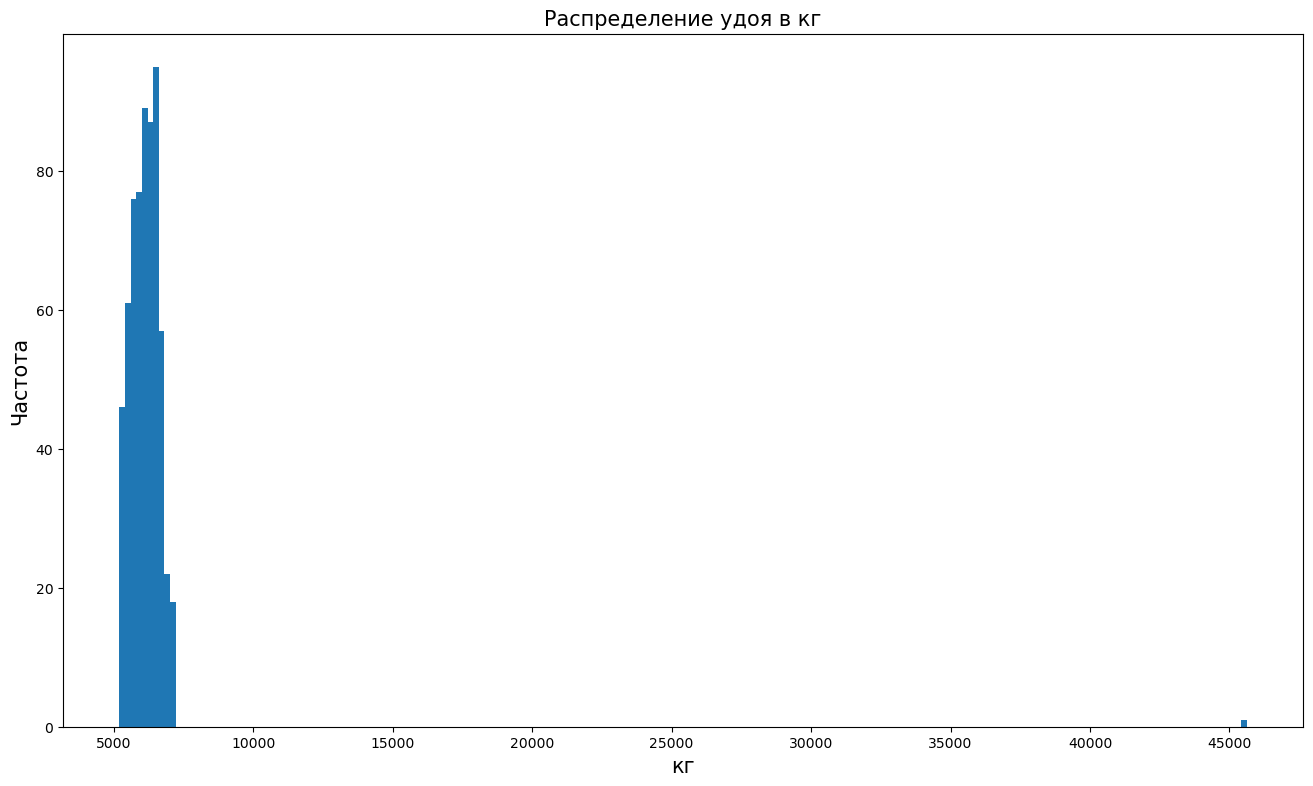

In [22]:
plt.figure(figsize=(16, 9))
plt.hist(main['yield_kg'], bins=200)
plt.title('Распределение удоя в кг', fontsize=15)
plt.xlabel('кг', fontsize=15)
plt.ylabel('Частота', fontsize=15);

In [23]:
main['yield_kg'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: yield_kg, dtype: float64

Присутствует аномальные значения поскольку 3 квартиль 6500, отфильтруем данные которые меньше 8000 кг.

In [24]:
main = main.loc[main['yield_kg'] <= 8000, :]

In [25]:
main.isna().sum()

id              0
yield_kg        0
efu             0
protein_g       0
spr_%           0
breed           0
pasture_type    0
father_breed    0
fat_%           0
protein_%       0
milk_taste      0
age             0
dtype: int64

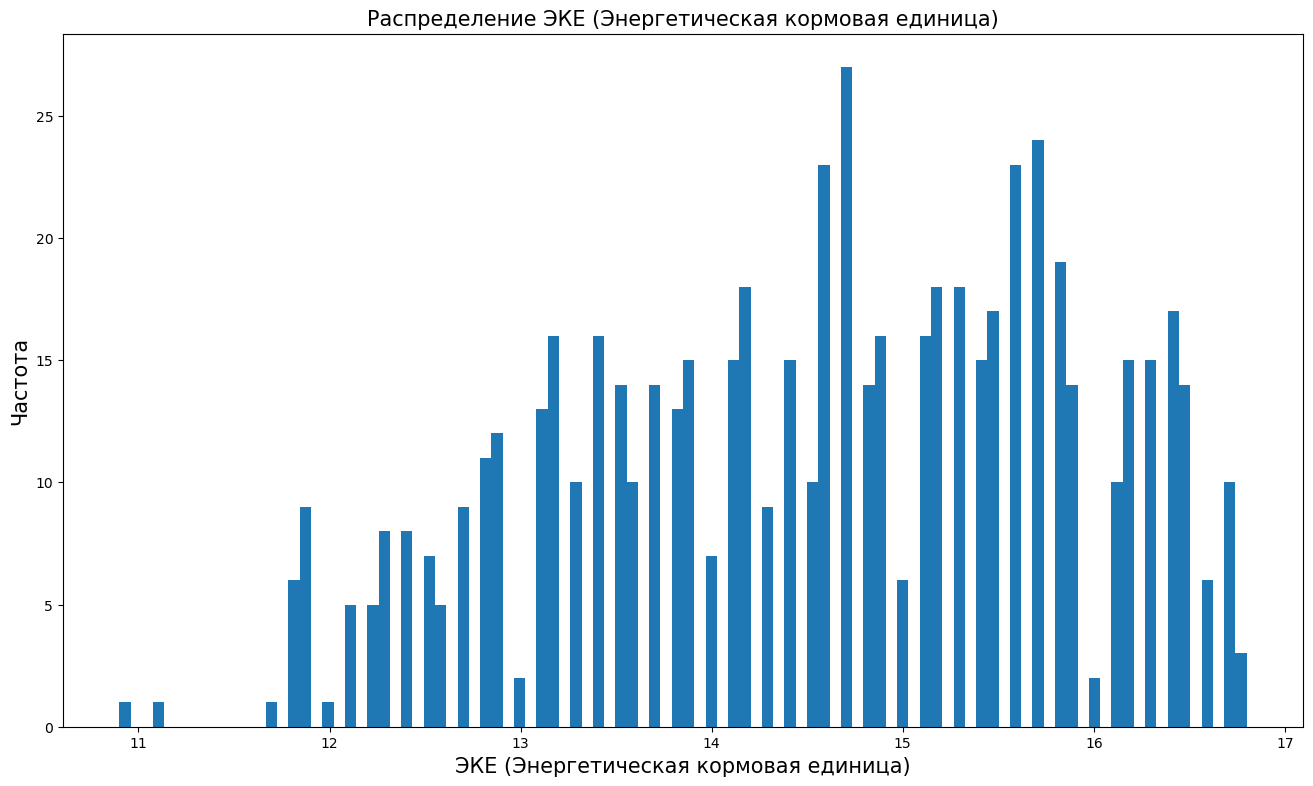

In [26]:
plt.figure(figsize=(16, 9))
plt.hist(main['efu'], bins=100)
plt.title('Распределение ЭКЕ (Энергетическая кормовая единица)', fontsize=15)
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)', fontsize=15)
plt.ylabel('Частота', fontsize=15);

На гистограмме аномалий нет

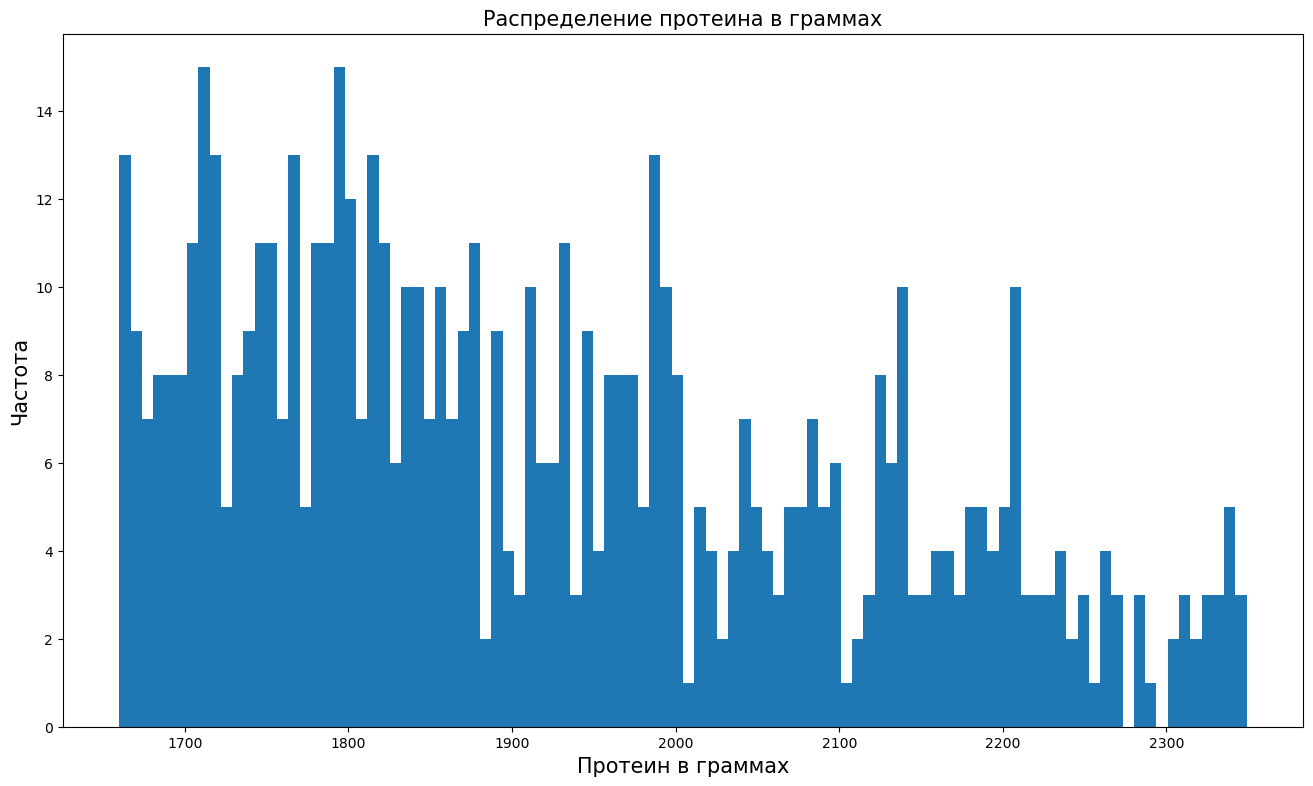

In [27]:
plt.figure(figsize=(16, 9))
plt.hist(main['protein_g'], bins=100)
plt.title('Распределение протеина в граммах', fontsize=15)
plt.xlabel('Протеин в граммах', fontsize=15)
plt.ylabel('Частота', fontsize=15);

Также аномалий незамеченно

In [28]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            628 non-null    int64  
 1   yield_kg      628 non-null    int64  
 2   efu           628 non-null    float64
 3   protein_g     628 non-null    int64  
 4   spr_%         628 non-null    float64
 5   breed         628 non-null    object 
 6   pasture_type  628 non-null    object 
 7   father_breed  628 non-null    object 
 8   fat_%         628 non-null    float64
 9   protein_%     628 non-null    float64
 10  milk_taste    628 non-null    object 
 11  age           628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


In [29]:
main['spr_%'].describe()

count    628.000000
mean      91.308917
std        3.222125
min       84.000000
25%       89.000000
50%       93.000000
75%       94.000000
max       96.000000
Name: spr_%, dtype: float64

In [30]:
main['fat_%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_%, dtype: float64

### dad

Также переведем строковый тип в нижний регистр

In [31]:
dad['father_name'].value_counts()

father_name
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64

In [32]:
dad['father_name'] = dad['father_name'].str.lower()

In [33]:
dad.duplicated().sum()

0

### cow_buy

В данной таблице также присутствуют некорректные типы данных

In [34]:
ls = ['current_fat_%', 'current_protein_%']

for s in ls:
    cow_buy[s] = cow_buy[s].apply(lambda x: float(x.split()[0].replace(',','.')))
    cow_buy[s] = cow_buy[s].astype('float')
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   breed              20 non-null     object 
 1   pasture_type       20 non-null     object 
 2   father_breed       20 non-null     object 
 3   father_name        20 non-null     object 
 4   current_fat_%      20 non-null     float64
 5   current_protein_%  20 non-null     float64
 6   age                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [35]:
columns = list(cow_buy.columns)

for s in columns:
    if str(cow_buy[s].dtype) == 'object':
        cow_buy[s] = cow_buy[s].str.lower()
cow_buy.head()

,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [36]:
cow_buy['current_fat_%'].describe()

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: current_fat_%, dtype: float64

In [37]:
cow_buy['current_protein_%'].describe()

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: current_protein_%, dtype: float64

In [38]:
columns = list(cow_buy.columns)

for s in columns:
    if str(cow_buy[s].dtype) == 'object':
        print(cow_buy[s].value_counts(), '\n')

breed
рефлешнсоверинг    11
вис бик айдиал      9
Name: count, dtype: int64 

pasture_type
равнинное    11
холмистое     9
Name: count, dtype: int64 

father_breed
соверин    12
айдиал      8
Name: count, dtype: int64 

father_name
буйный      8
геркулес    6
барин       4
соловчик    2
Name: count, dtype: int64 

age
более_2_лет    15
менее_2_лет     5
Name: count, dtype: int64 



### Промежуточные итоги

- В каждой таблице был приведен корректный тип данных
- Все строковые стоблцы были переведены в нижний регистр
- Пропусков нет
- Явные и неявные дубликаты были отработаны
- Были построенны гистограммы для поиска аномальных значений в данных
- Аномалии были отработаны

## Исследовательский анализ данных

## main

Напишем функцию для построения круговой диаграммы

In [39]:
def pie_plot(df):
    fig = plt.figure(figsize=(16, 9))
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    pivot = df.pivot_table(index='breed', values='id', aggfunc='count').reset_index()
    ax1.pie(pivot['id'], labels=pivot['breed'], autopct='%.1f%%')
    ax1.set_title('Соотношение пород')
    
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    pivot = df.pivot_table(index='pasture_type', values='id', aggfunc='count').reset_index()
    ax2.pie(pivot['id'], labels=pivot['pasture_type'], autopct='%.1f%%')
    ax2.set_title('Соотношение типов пастбищ')
    
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    pivot = df.pivot_table(index='father_breed', values='id', aggfunc='count').reset_index()
    ax3.pie(pivot['id'], labels=pivot['father_breed'], autopct='%.1f%%')
    ax3.set_title('Соотношение пород папы быка')
    
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    pivot = df.pivot_table(index='milk_taste', values='id', aggfunc='count').reset_index()
    ax4.pie(pivot['id'], labels=pivot['milk_taste'], autopct='%.1f%%')
    ax4.set_title('Соотношение вкуса молока')
    
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
    pivot = df.pivot_table(index='age', values='id', aggfunc='count').reset_index()
    ax5.pie(pivot['id'], labels=pivot['age'], autopct='%.1f%%')
    ax5.set_title('Соотношение возрастов')
    fig.suptitle('Все коровы', fontsize=15)

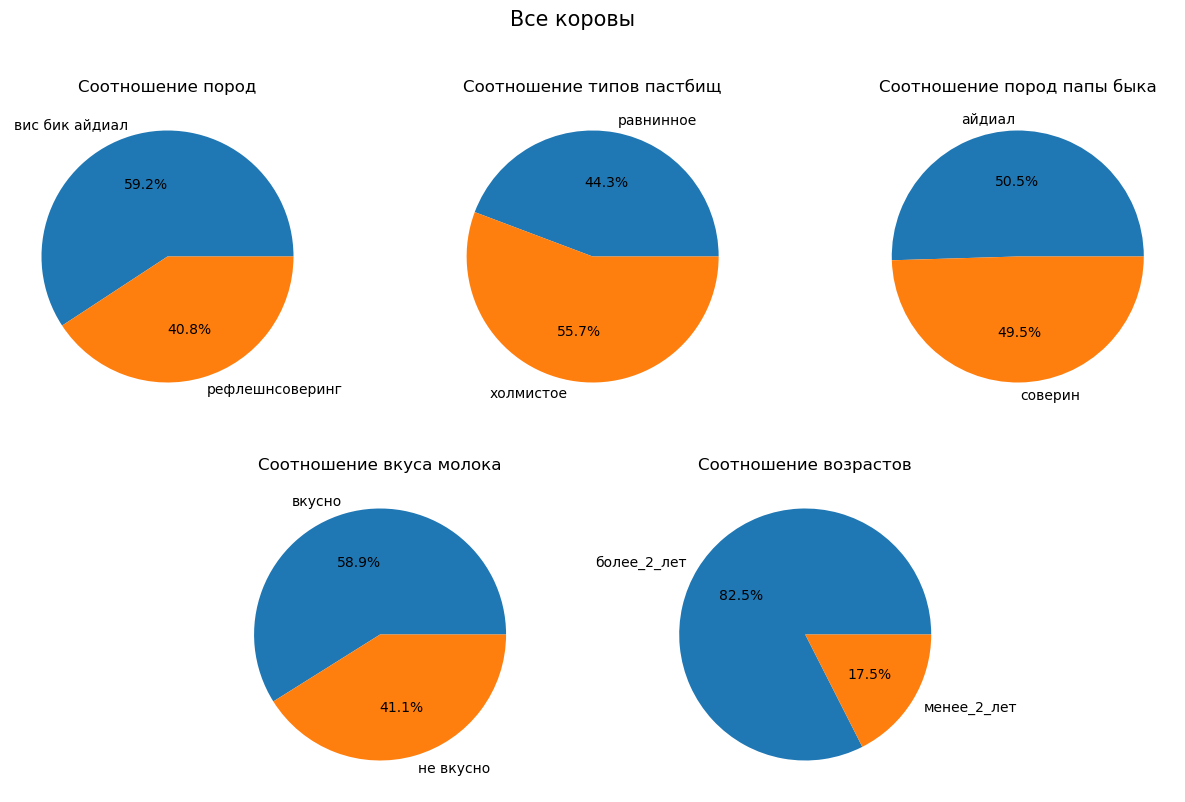

In [40]:
pie_plot(main)

- Больше всего пород у фермера `вис бик айдиал`
- Основный тип пастбищ `холмистое`
- Породы папы быка примерно одинаковое `айдиал` и `соверин`
- В основном молоко вкусное
- У 83% коров возраст более 2 лет, у остальные менее

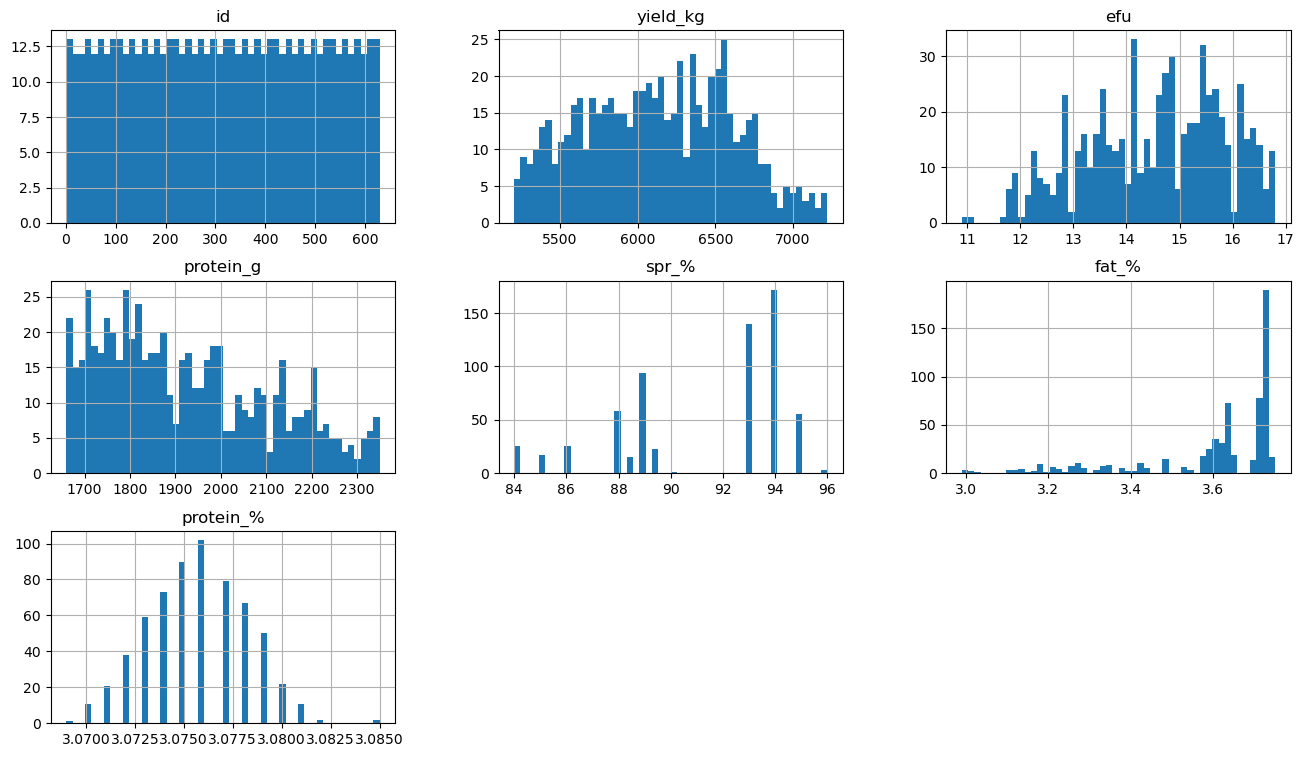

In [41]:
main.hist(bins=50, figsize=(16, 9));

У всех числовых показателей распределение не является нормальным, кроме процента белка

Сохраним названия числовых и строковых столбцов

In [42]:
columns = list(main.columns)
ls_obj = []
ls_float = []

for s in columns:
    if str(main[s].dtype) == 'object':
        ls_obj.append(s)
    else:
        ls_float.append(s)
ls_float.remove('id')

Напишем функцию которая будет строить диаграммы

In [43]:
def barh_plot(df, column, title):
    
    ls = list(df['breed'].unique())
    
    pivot1 = df.loc[df['breed'] == ls[0]].pivot_table(index=column, values=ls_float, aggfunc='median').reset_index()
    pivot2 = df.loc[df['breed'] == ls[1]].pivot_table(index=column, values=ls_float, aggfunc='median').reset_index()
    
    x = np.arange(len(pivot1[column]))
    fig = plt.figure(figsize=(9, 16))
    fig.subplots_adjust(left=0.13, 
                        right=0.93, 
                        top=1.0, 
                        bottom= 0.27, 
                        wspace= 0.2, 
                        hspace=0.5)
    
    width = 0.4
    
    ax1 = fig.add_subplot(611)    
    ax1.barh(x+0.2, pivot1['efu'], width, label=ls[0])
    ax1.barh(x-0.2, pivot2['efu'], width, label=ls[1])
    ax1.set_yticks(x)
    ax1.set_yticklabels(pivot1[column])
    ax1.set_title('Медианное значение ЭКЕ (Энергетическая кормовая единица) для разных пород и ' + title)
    ax1.set_xlabel('ЭКЕ (Энергетическая кормовая единица)')

    ax2 = fig.add_subplot(612)
    ax2.barh(x+0.2, pivot1['fat_%'], width, label=ls[0])
    ax2.barh(x-0.2, pivot2['fat_%'], width, label=ls[1])
    ax2.set_yticks(x)
    ax2.set_yticklabels(pivot1[column])   
    ax2.set_title('Медианное значение жирности для разных пород и ' + title)
    ax2.set_xlabel('Жирность, %')

    ax3 = fig.add_subplot(613)
    ax3.barh(x+0.2, pivot1['protein_%'], width, label=ls[0])
    ax3.barh(x-0.2, pivot2['protein_%'], width, label=ls[1])
    ax3.set_yticks(x)
    ax3.set_yticklabels(pivot1[column])
    ax3.set_title('Медианное значение белка для разных пород и ' + title)
    ax3.set_xlabel('Белок, %')

    ax4 = fig.add_subplot(614)
    ax4.barh(x+0.2, pivot1['protein_g'], width, label=ls[0])
    ax4.barh(x-0.2, pivot2['protein_g'], width, label=ls[1])
    ax4.set_yticks(x)
    ax4.set_yticklabels(pivot1[column]) 
    ax4.set_title('Медианное значение протеина для разных пород и ' + title)
    ax4.set_xlabel('Протеин, гр.')

    ax5 = fig.add_subplot(615)
    ax5.barh(x+0.2, pivot1['spr_%'], width, label=ls[0])
    ax5.barh(x-0.2, pivot2['spr_%'], width, label=ls[1])
    ax5.set_yticks(x)
    ax5.set_yticklabels(pivot1[column])  
    ax5.set_title('Медианное значение СПО (Сахаро-протеиновое соотношение) для разных пород и ' + title)
    ax5.set_xlabel('СПО (Сахаро-протеиновое соотношение)')

    ax6 = fig.add_subplot(616)
    ax6.barh(x+0.2, pivot1['yield_kg'], width, label=ls[0])
    ax6.barh(x-0.2, pivot2['yield_kg'], width, label=ls[1])
    ax6.set_yticks(x)
    ax6.set_yticklabels(pivot1[column])
    ax6.set_title('Медианное значение удоя для разных пород и ' + title)
    ax6.set_xlabel('Удой, кг')
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels)

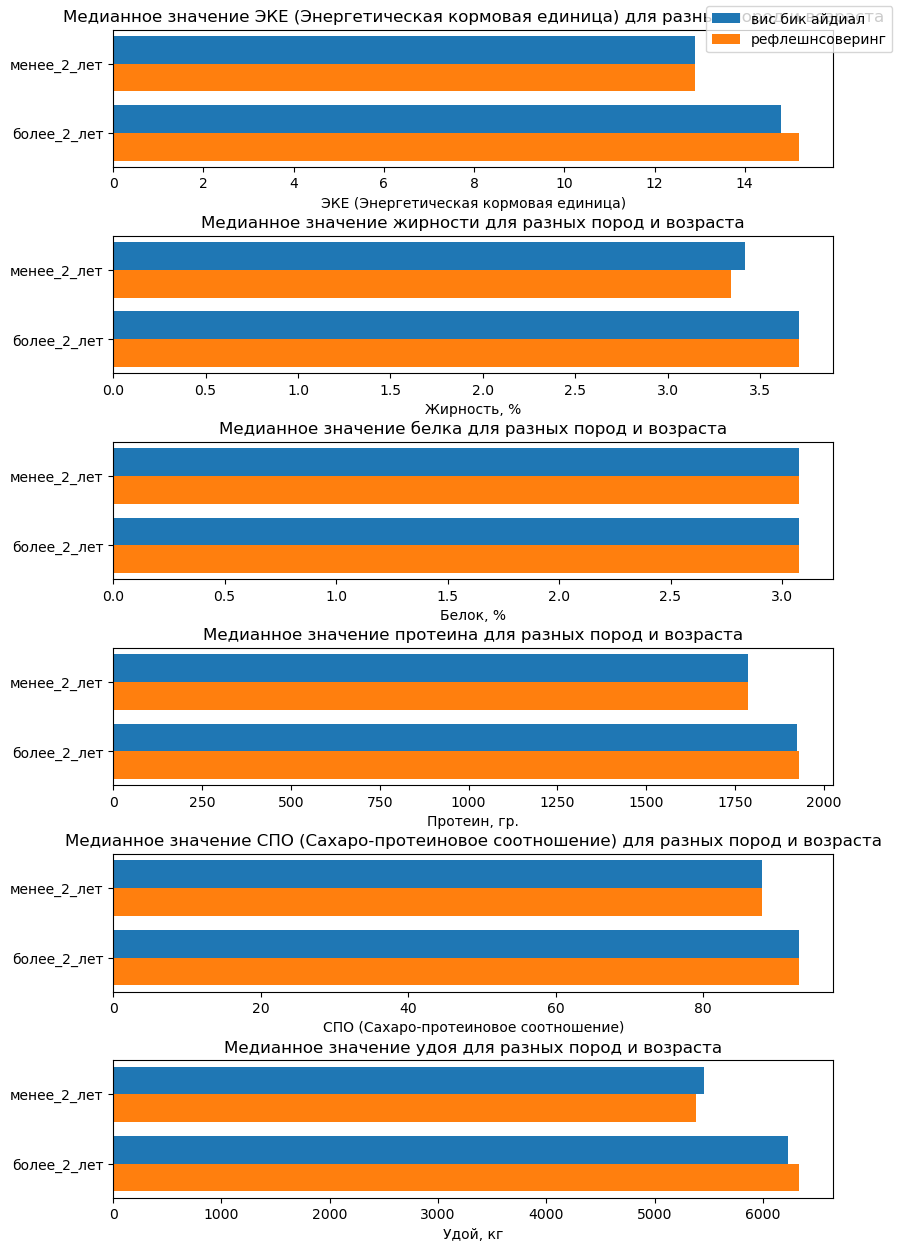

In [44]:
barh_plot(main, 'age', 'возраста')

- Медианные значения ЭКЕ для обеих пород возрастом менее двух лет равны
- У `рефлешнсоверинг` ЭКЕ выше при возрасте более 2 лет
- У `вис бик айдиал` жирность выше при возрасте менее 2 лет
- При возрасте более двух лет жирность одинаковая
- Процент белка для обоих пород обоих возрастов одинаковый
- Значение протеина для обеих пород и возрастов практически равны
- СПО одинаковое для обеих пород и возрастов
- Удой различается при возрасте менее 2 лет у `вис бик айдиал` выше, при более двух лет ситуация обратная

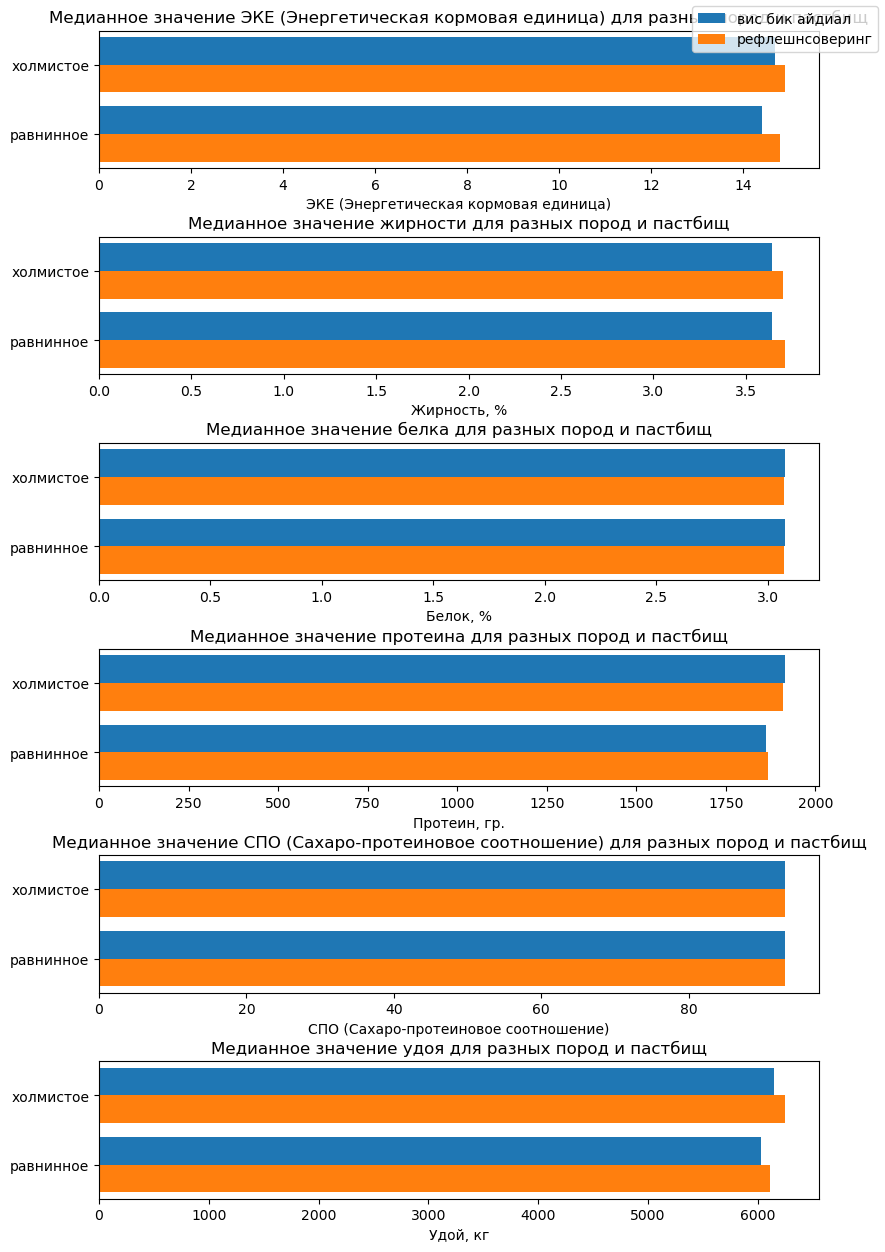

In [45]:
barh_plot(main, 'pasture_type', 'пастбищ')

- Медианные значения ЭКЕ для `рефлешнсоверинг` выше не зависимо от типа пастбища
- У `рефлешнсоверинг` жирность выше не зависимо от типа пастбища
- При возрасте более двух лет жирность одинаковая
- Процент белка для обоих пород обоих типов пастбищ одинаковый
- Значение протеина для обеих пород и типов пастбищ практически равны
- СПО одинаковое для обеих пород и ипов пастбищ
- Удой выше у `рефлешнсоверинг` на обеих типах пастбищ

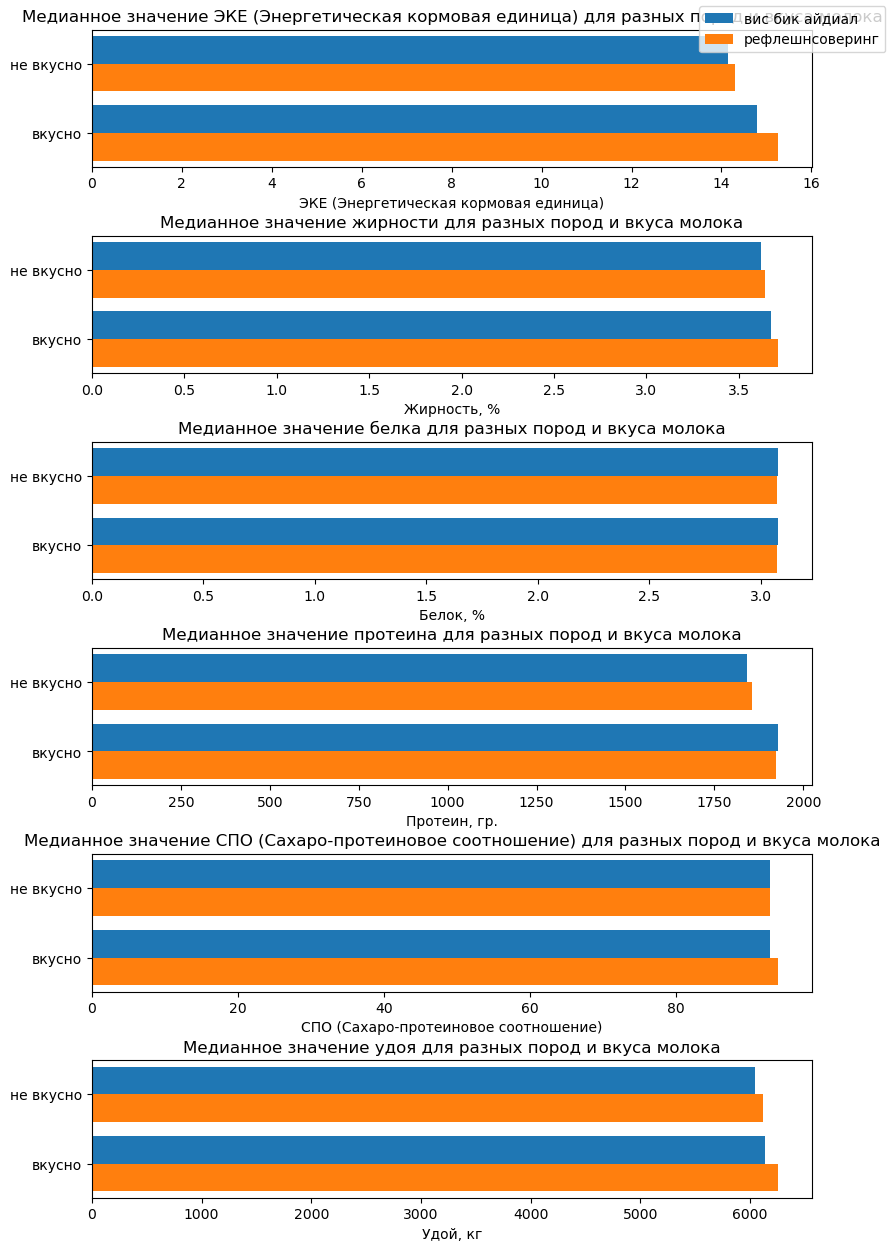

In [46]:
barh_plot(main, 'milk_taste', 'вкуса молока')

Все показатели примерное равны, но у породы `рефлешнсоверинг` чуть выше. Отсюда можно сказать, что на вкус молока влияют другие показатели 

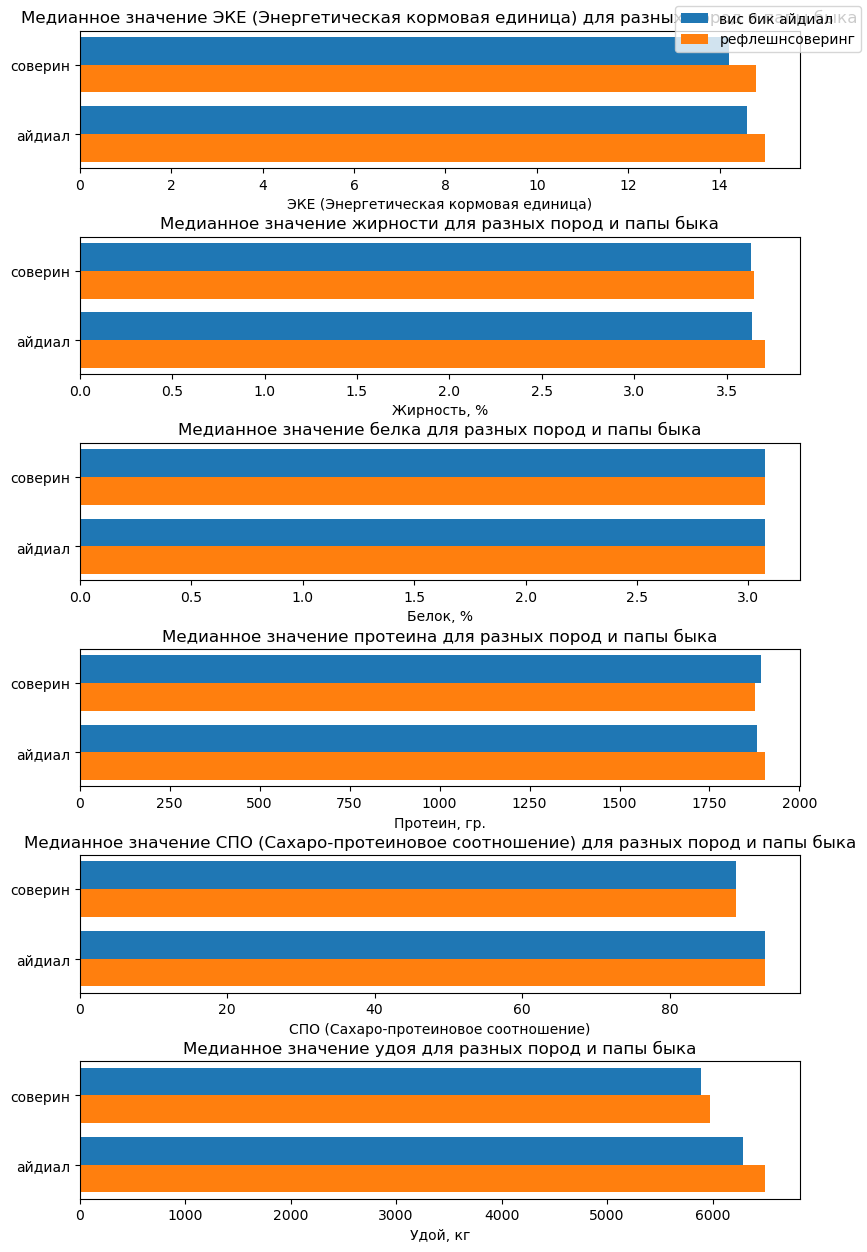

In [47]:
barh_plot(main, 'father_breed', 'папы быка')

Практически все показатели у `рефлешнсоверинг` выше, чем у `вис бик айдиал`, но также можно заметить, что все показатели порода папы быка `айдиал` выше, чем у `соверин`

**Промежуточные выводы**
- Больше всего пород у фермера `вис бик айдиал`
- Основный тип пастбищ `холмистое`
- Породы папы быка примерно одинаковое `айдиал` и `соверин`
- В основном молоко вкусное
- У 83% коров возраст более 2 лет, у остальные менее
- У всех числовых показателей распределение не является нормальным, кроме процента белка
- Медианные значения ЭКЕ для обеих пород возрастом менее двух лет равны
- У `рефлешнсоверинг` ЭКЕ выше при возрасте более 2 лет
- У `вис бик айдиал` жирность выше при возрасте менее 2 лет
- При возрасте более двух лет жирность одинаковая
- Процент белка для обоих пород обоих возрастов одинаковый
- Значение протеина для обеих пород и возрастов практически равны
- СПО одинаковое для обеих пород и возрастов
- Удой различается при возрасте менее 2 лет у `вис бик айдиал` выше, при более двух лет ситуация обратная
- Медианные значения ЭКЕ для `рефлешнсоверинг` выше не зависимо от типа пастбища
- У `рефлешнсоверинг` жирность выше не зависимо от типа пастбища
- При возрасте более двух лет жирность одинаковая
- Процент белка для обоих пород обоих типов пастбищ одинаковый
- Значение протеина для обеих пород и типов пастбищ практически равны
- СПО одинаковое для обеих пород и ипов пастбищ
- Удой выше у `рефлешнсоверинг` на обеих типах пастбищ
- Все показатели примерное равны для вкуса молока, но у породы `рефлешнсоверинг` чуть выше. Отсюда можно сказать, что на вкус молока влияют другие показатели 
- Практически все показатели у `рефлешнсоверинг` выше для различных пород папа быка, чем у `вис бик айдиал`, но также можно заметить, что все показатели порода папы быка `айдиал` выше, чем у `соверин`

**Выводы о данных**
- У удоя была аномалия, которая была отработана. Распределение числовых показателей имеют ненормальное распределение, кроме процента белка, скорее всего из-за того, что в выборке учавствуют только две породы коров, которые более вероятно дают одинаковое по данным показателям молоко
- СПО (Сахаро-протеиновое соотношение) из коэф. была переведена в проценты для удобства
- Категориальные признаки представлены только двумя значениями так, что можно закодировать их бинарно

### dad

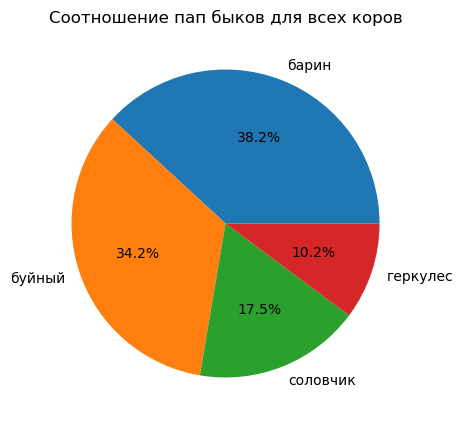

In [48]:
dad_pivot = (dad
             .pivot_table(index='father_name', values='id', aggfunc='count')
             .reset_index()
             .sort_values(by='id', ascending=False))
plt.figure(figsize=(5, 5))
plt.pie(dad_pivot['id'], labels=dad_pivot['father_name'], autopct='%.1f%%')
plt.title('Соотношение пап быков для всех коров');

- Больше всего детей у Барина 38% и Буйного 34%
- У Соловчика и Геркулеса по 18% и 10% соответственно

### cow_buy

In [49]:
def pie_plot1(df):
    fig = plt.figure(figsize=(16, 9))
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    pivot = df.pivot_table(index='breed', values='id', aggfunc='count').reset_index()
    ax1.pie(pivot['id'], labels=pivot['breed'], autopct='%.1f%%')
    ax1.set_title('Соотношение пород')
    
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    pivot = df.pivot_table(index='pasture_type', values='id', aggfunc='count').reset_index()
    ax2.pie(pivot['id'], labels=pivot['pasture_type'], autopct='%.1f%%')
    ax2.set_title('Соотношение типов пастбищ')
    
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    pivot = df.pivot_table(index='father_breed', values='id', aggfunc='count').reset_index()
    ax3.pie(pivot['id'], labels=pivot['father_breed'], autopct='%.1f%%')
    ax3.set_title('Соотношение пород папы быка')
    
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    pivot = df.pivot_table(index='father_name', values='id', aggfunc='count').reset_index()
    ax4.pie(pivot['id'], labels=pivot['father_name'], autopct='%.1f%%')
    ax4.set_title('Соотношение пап быков')
    
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
    pivot = df.pivot_table(index='age', values='id', aggfunc='count').reset_index()
    ax5.pie(pivot['id'], labels=pivot['age'], autopct='%.1f%%')
    ax5.set_title('Соотношение возрастов')
    plt.title('Коровы на покупку')
    fig.suptitle('Коровы на покупку', fontsize=15)

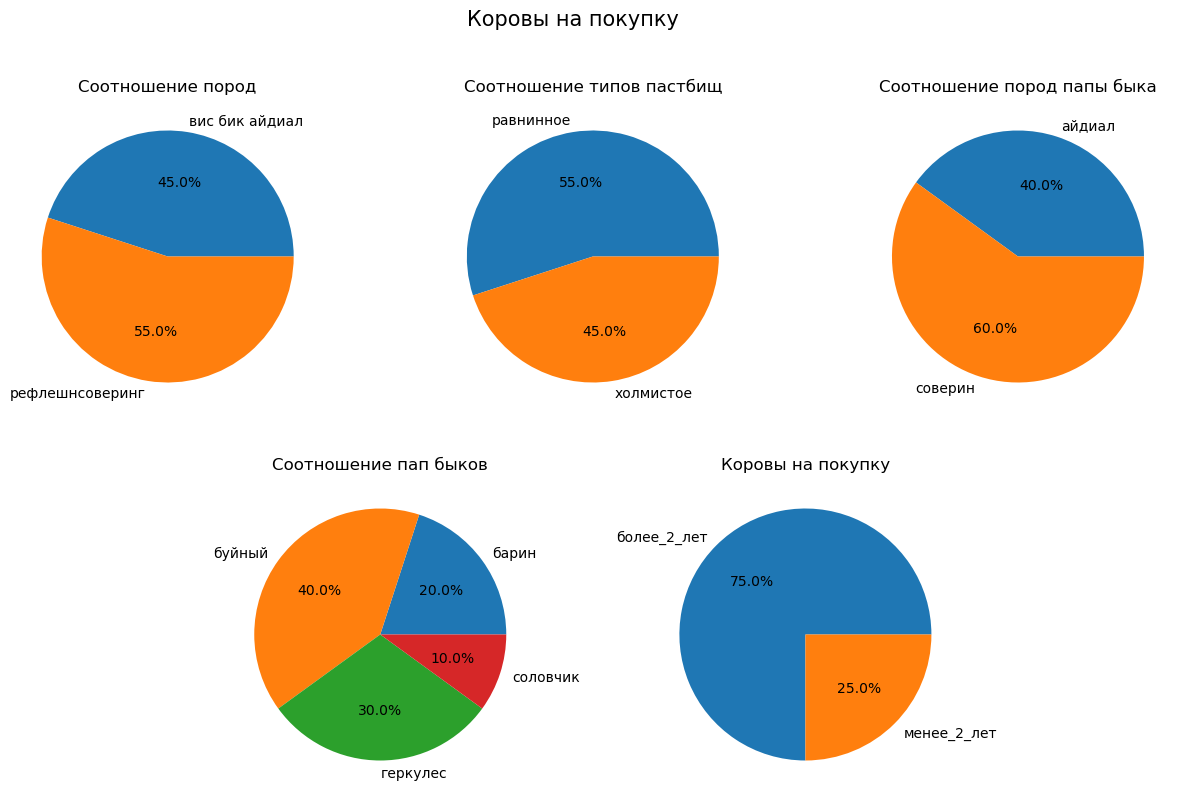

In [50]:
cow_buy.index.name = 'id'
pie_plot1(cow_buy.reset_index())

- Пород `Вис бик айдиал` и `Рефлешнсоверинг` поровну
- Поровну типы пастбищ
- Пап быков `Соверин` больше 63%, чем `Айдиал` 37%
- Больше всего коров у которых папа бык `Буйный` и `Геркулес` по 44% и 31% соответственно, `Соловчик` и `Барин` делят остальную часть поровну
- В основном возраст коров более 2 лет 69%

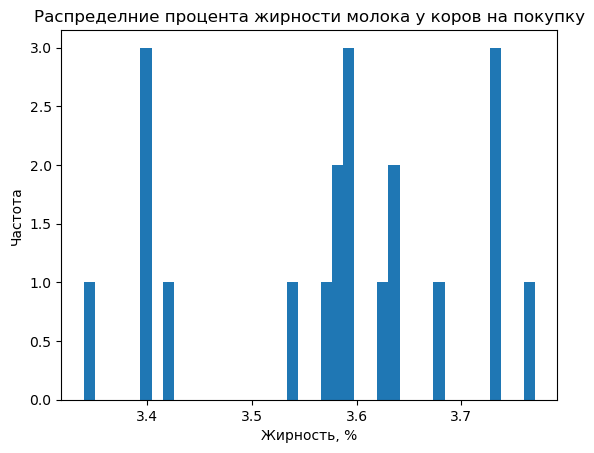

In [51]:
plt.hist(cow_buy['current_fat_%'], bins=40)
plt.xlabel('Жирность, %')
plt.ylabel('Частота')
plt.title('Распределние процента жирности молока у коров на покупку');

Наиболее вероятные значения это 3.4% и 3.75% жирности, которые соответствуют скорее всего двум данным породам, а остальные значения отклонения

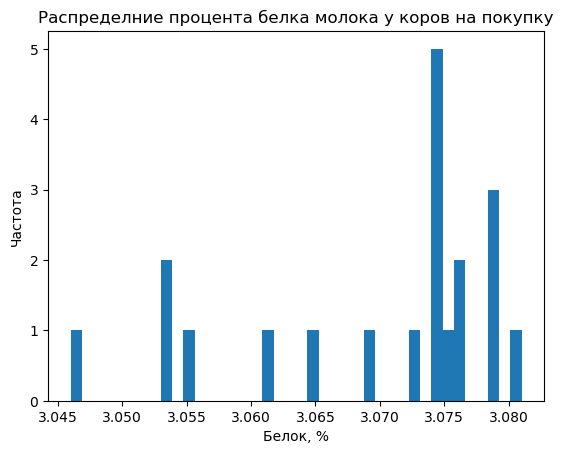

In [52]:
plt.hist(cow_buy['current_protein_%'], bins=40)
plt.xlabel('Белок, %')
plt.ylabel('Частота')
plt.title('Распределние процента белка молока у коров на покупку');

Больше всего коров с процентом белка около 3.053, 3.075, 3.079%

In [53]:
def barh_plot1(df, column, title):
    ls = list(df['breed'].unique())

    pivot1 = (df.loc[df['breed'] == ls[0]]
              .pivot_table(index=column, values=['current_fat_%', 'current_protein_%'], aggfunc='median')
              .reset_index())
    pivot2 = (df.loc[df['breed'] == ls[1]]
              .pivot_table(index=column, values=['current_fat_%', 'current_protein_%'], aggfunc='median')
              .reset_index())

    x = np.arange(len(pivot1[column]))
    fig = plt.figure(figsize=(9, 10))
    fig.subplots_adjust(left=0.13, 
                        right=0.93, 
                        top=1.0, 
                        bottom= 0.27, 
                        wspace= 0.2, 
                        hspace=0.5)

    width = 0.4

    ax1 = fig.add_subplot(211)
    ax1.barh(x+0.2, pivot1['current_protein_%'], width, label=ls[0])
    ax1.barh(x-0.2, pivot2['current_protein_%'], width, label=ls[1])
    ax1.set_yticks(x)
    ax1.set_yticklabels(pivot1[column])
    ax1.set_title('Медианное значение белка для разных пород и ' + title)
    ax1.set_xlabel('Белок, %')

    ax2 = fig.add_subplot(212)
    ax2.barh(x+0.2, pivot1['current_fat_%'], width, label=ls[0])
    ax2.barh(x-0.2, pivot2['current_fat_%'], width, label=ls[1])
    ax2.set_yticks(x)
    ax2.set_yticklabels(pivot1[column])   
    ax2.set_title('Медианное значение жирности для разных пород и ' + title)
    ax2.set_xlabel('Жирность, %')
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels)

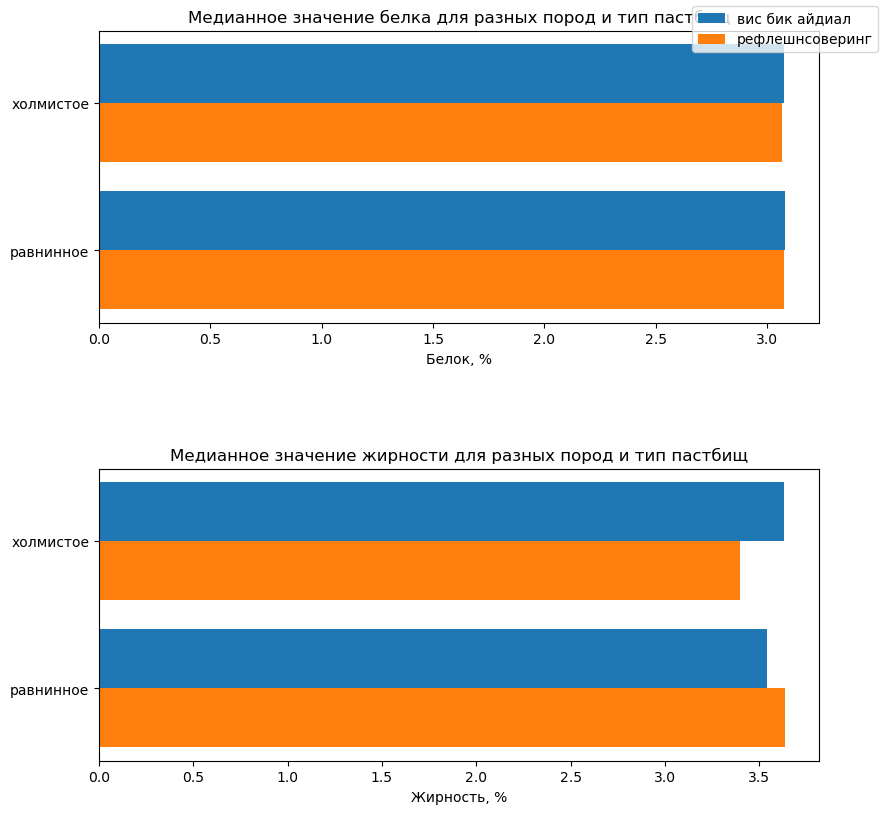

In [54]:
barh_plot1(cow_buy, 'pasture_type', 'тип пастбищ')

- Значение белка у обоих пород для обеих типов пастибищ одинаковое
- Значение жирности у `Вис бик айдиал` выше на холмистой местности, на равнинной наоборот

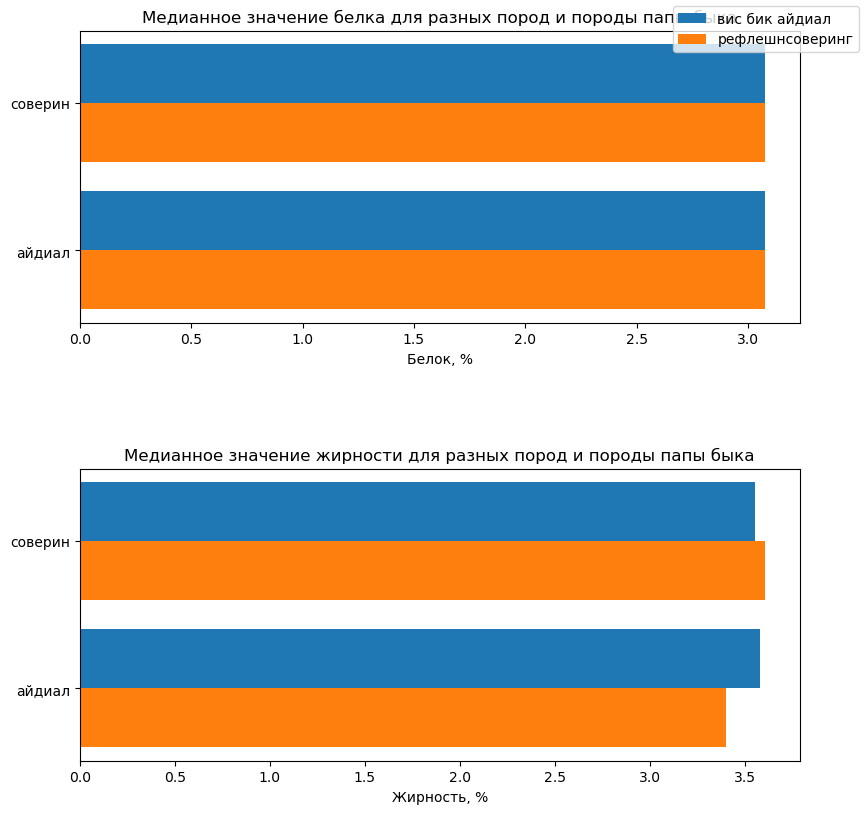

In [55]:
barh_plot1(cow_buy, 'father_breed', 'породы папы быка')

- Значение белка у обеих пород пап быков и самих коров не различаются
- У `Вис бик айдиал` жирность ниже у породы папы `Соверин`, у `Айдиал` ситуация противоположная

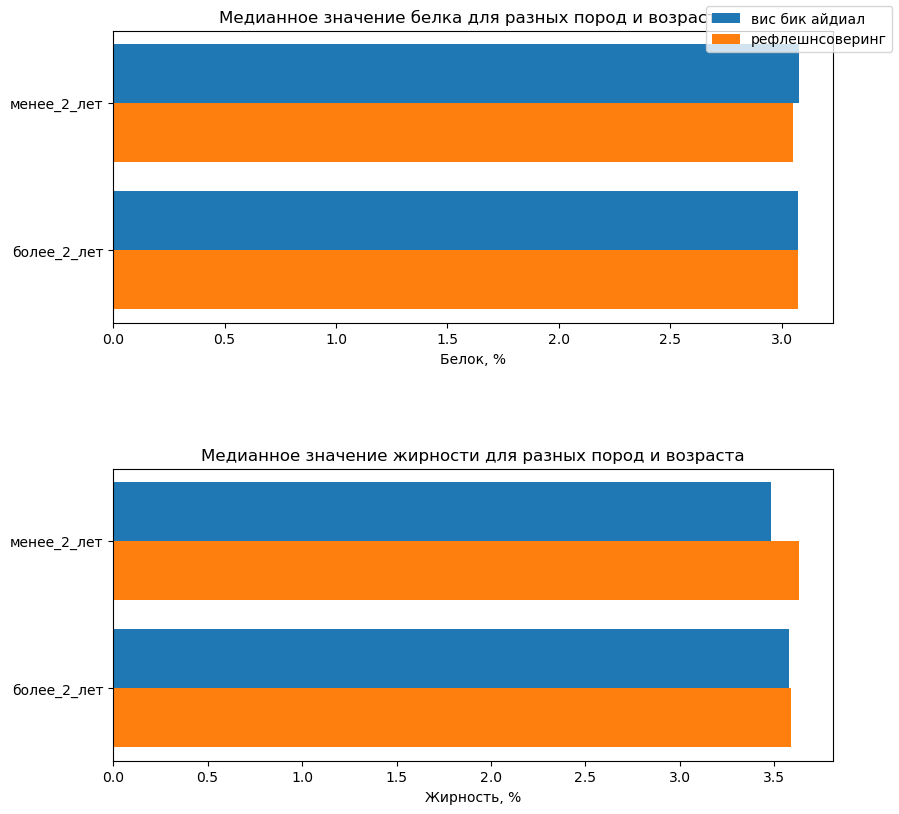

In [56]:
barh_plot1(cow_buy, 'age', 'возраста')

- Значения белка у обеих пород и возраста не различаются
- Жирность у коров с возрастом менее 2 лет выше у `Рефлешнсоверинг`, на возрасте более 2 лет практически одинаковая жирность у обеих пород

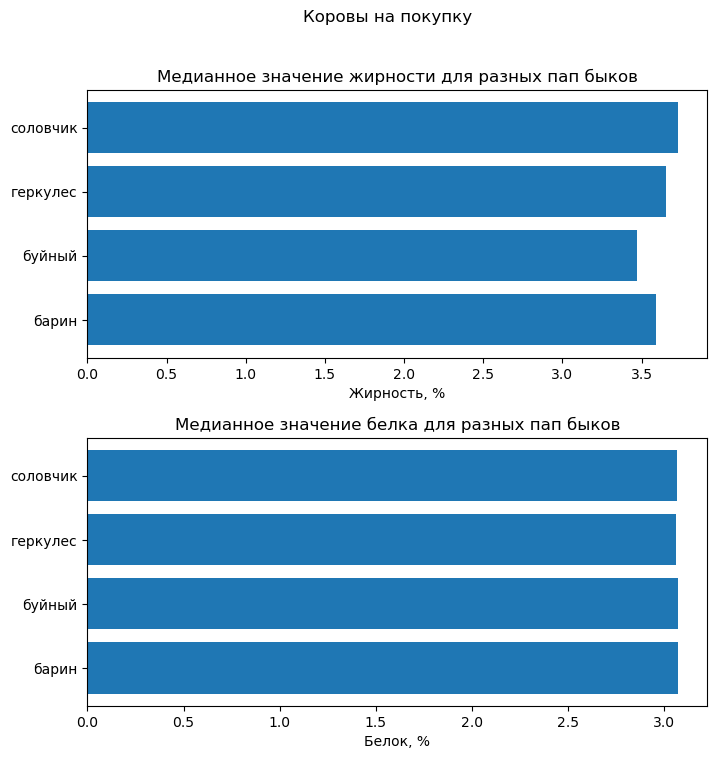

In [57]:
cow_buy_pivot = (cow_buy
                 .pivot_table(index='father_name', 
                              values=['current_fat_%', 'current_protein_%'], 
                              aggfunc='median')
                 .reset_index())
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(211)
ax1.barh(cow_buy_pivot['father_name'], cow_buy_pivot['current_fat_%'])
ax1.set_title('Медианное значение жирности для разных пап быков')
ax1.set_xlabel('Жирность, %')


ax2 = fig.add_subplot(212)
ax2.barh(cow_buy_pivot['father_name'], cow_buy_pivot['current_protein_%'])
ax2.set_title('Медианное значение белка для разных пап быков')
ax2.set_xlabel('Белок, %')


fig.suptitle('Коровы на покупку');

- Процент белка у коров в зависимости от пап быков одинаковое
- Жироность выше от `Геркулеса` и `Соловчика`, самая низкая от `Буйного`

### Выводы

- **main**
    - Больше всего пород у фермера `вис бик айдиал`
    - Основный тип пастбищ `холмистое`
    - Породы папы быка примерно одинаковое `айдиал` и `соверин`
    - В основном молоко вкусное
    - У 83% коров возраст более 2 лет, у остальные менее
    - У всех числовых показателей распределение не является нормальным, кроме процента белка
    - Медианные значения ЭКЕ для обеих пород возрастом менее двух лет равны
    - У `рефлешнсоверинг` ЭКЕ выше при возрасте более 2 лет
    - У `вис бик айдиал` жирность выше при возрасте менее 2 лет
    - При возрасте более двух лет жирность одинаковая
    - Процент белка для обоих пород обоих возрастов одинаковый
    - Значение протеина для обеих пород и возрастов практически равны
    - СПО одинаковое для обеих пород и возрастов
    - Удой различается при возрасте менее 2 лет у `вис бик айдиал` выше, при более двух лет ситуация обратная
    - Медианные значения ЭКЕ для `рефлешнсоверинг` выше не зависимо от типа пастбища
    - У `рефлешнсоверинг` жирность выше не зависимо от типа пастбища
    - При возрасте более двух лет жирность одинаковая
    - Процент белка для обоих пород обоих типов пастбищ одинаковый
    - Значение протеина для обеих пород и типов пастбищ практически равны
    - СПО одинаковое для обеих пород и ипов пастбищ
    - Удой выше у `рефлешнсоверинг` на обеих типах пастбищ
    - Все показатели примерное равны для вкуса молока, но у породы `рефлешнсоверинг` чуть выше. Отсюда можно сказать, что на вкус молока влияют другие показатели 
    - Практически все показатели у `рефлешнсоверинг` выше для различных пород папа быка, чем у `вис бик айдиал`, но также можно заметить, что все показатели порода папы быка `айдиал` выше, чем у `соверин`
    
- **dad**
    - Больше всего детей у Барина 38% и Буйного 34%
    - У Соловчика и Геркулеса по 18% и 10% соответственно
- **cow_buy**
    - Пород `Вис бик айдиал` и `Рефлешнсоверинг` поровну
    - Поровну типы пастбищ
    - Пап быков `Соверин` больше 63%, чем `Айдиал` 37%
    - Больше всего коров у которых папа бык `Буйный` и `Геркулес` по 44% и 31% соответственно, `Соловчик` и `Барин` делят остальную часть поровну
    - В основном возраст коров более 2 лет 69%
    - Наиболее вероятные значения это 3.4% и 3.75% жирности, которые соответствуют скорее всего двум данным породам, а остальные значения отклонения
    - Больше всего коров с процентом белка около 3.053, 3.075, 3.079%
    - Значение белка у обоих пород для обеих типов пастибищ одинаковое
    - Значение жирности у `Вис бик айдиал` выше на холмистой местности, на равнинной наоборот
    - Значение белка у обеих пород пап быков и самих коров не различаются
    - У `Вис бик айдиал` жирность ниже у породы папы `Соверин`, у `Айдиал` ситуация противоположная
    - Значения белка у обеих пород и возраста не различаются
    - Жирность у коров с возрастом менее 2 лет выше у `Рефлешнсоверинг`, на возрасте более 2 лет практически одинаковая жирность у обеих пород
    - Процент белка у коров в зависимости от пап быков одинаковое
    - Жироность выше от `Геркулеса` и `Соловчика`, самая низкая от `Буйного`
    
**Выводы о данных**
- У удоя была аномалия, которая была отработана. Распределение числовых показателей имеют ненормальное распределение, кроме процента белка, скорее всего из-за того, что в выборке учавствуют только две породы коров, которые более вероятно дают одинаковое по данным показателям молоко
- СПО (Сахаро-протеиновое соотношение) из коэф. была переведена в проценты для удобства
- Категориальные признаки представлены только двумя значениями так, что можно закодировать их бинарно

## Корреляционный анализ

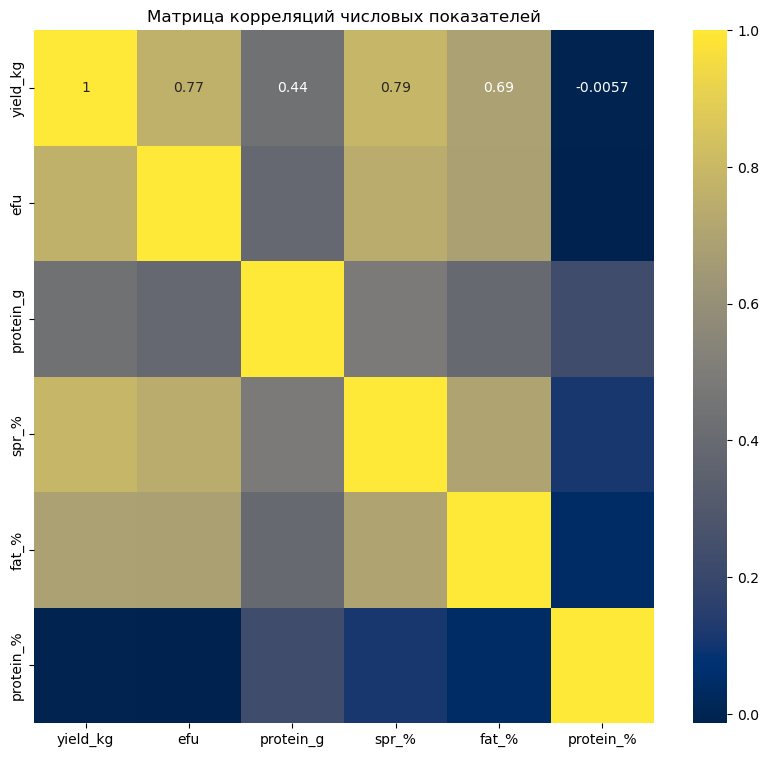

In [58]:
plt.figure(figsize=(10,9))
sns.heatmap(main[ls_float].corr(method='spearman'), annot=True, cmap='cividis')
plt.title('Матрица корреляций числовых показателей');

Коэффициенты корреляций удоя:
- ЭКЕ, высокая
- Протеин в граммах, слабая
- СПО, высокая
- Жирность, высокая
- Протеин в процентах, очень слабая

Коэффициенты корреляций ЭКЕ:
- Протеин в граммах, слабая
- СПО, высокая
- Жирность, средняя
- Протеин в процентах, очень слабая

Коэффициенты корреляций протеина в граммах:
- СПО, слабая
- Жирность, слабая
- Протеин в процентах, очень слабая

Коэффициенты корреляций СПО:
- Жирность, высокая
- Протеин в процентах, очень слабая

Коэффициенты корреляций Жирности:
- Протеин в процентах, очень слабая

Корреляция удоя от
-

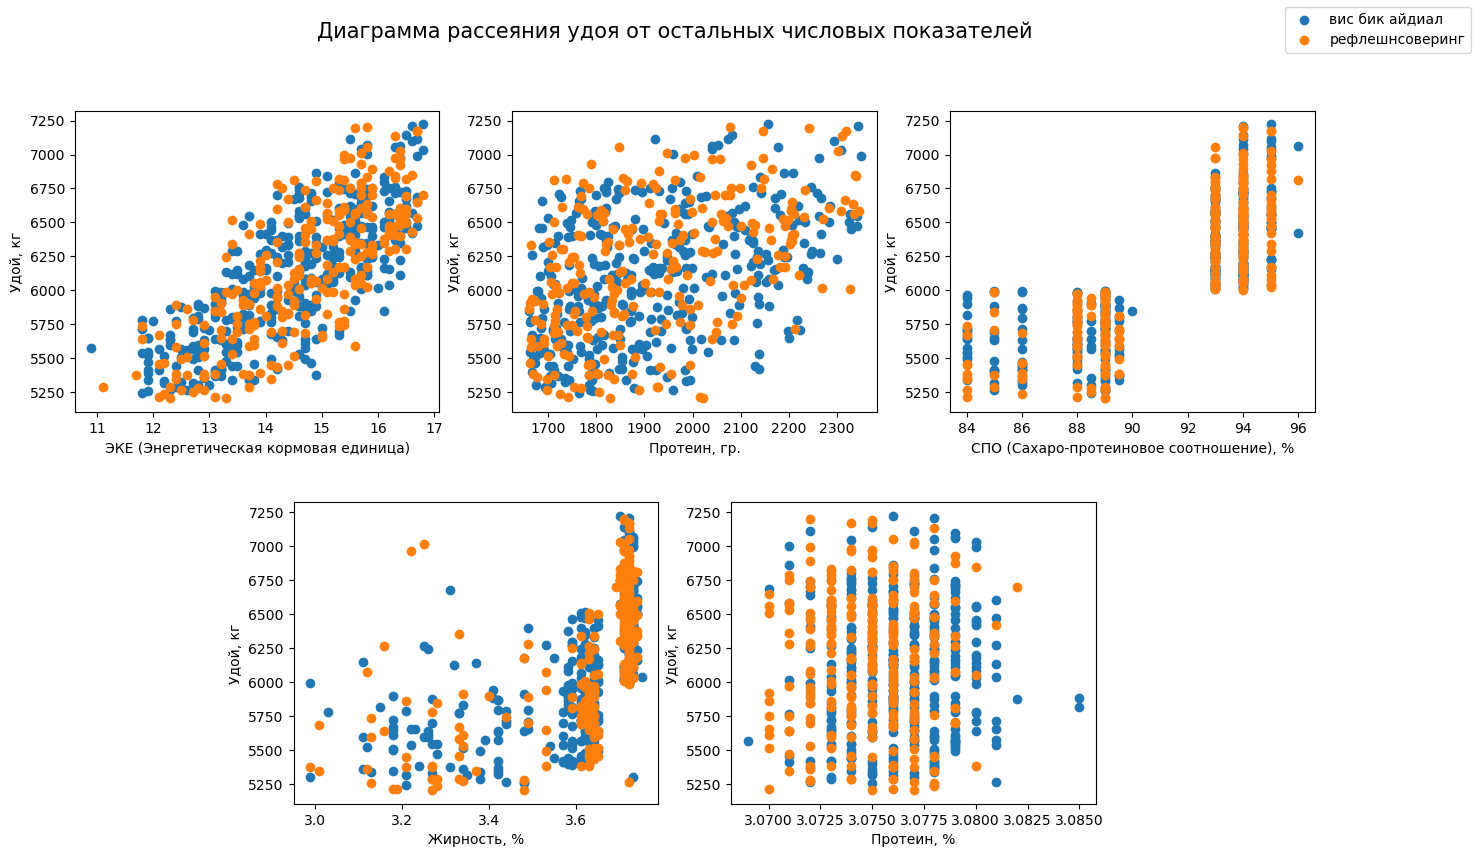

In [59]:
ls = list(main['breed'].unique())
main_breed_1 = main.loc[main['breed'] == ls[0]]
main_breed_2 = main.loc[main['breed'] == ls[1]]

fig = plt.figure(figsize=(16, 9))
fig.subplots_adjust(wspace= 0.5, hspace=0.3)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.scatter(main_breed_1['efu'], main_breed_1['yield_kg'], label=ls[0])
ax1.scatter(main_breed_2['efu'], main_breed_2['yield_kg'],  label=ls[1])
ax1.set_ylabel('Удой, кг')
ax1.set_xlabel('ЭКЕ (Энергетическая кормовая единица)')

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.scatter(main_breed_1['protein_g'], main_breed_1['yield_kg'],  label=ls[0])
ax2.scatter(main_breed_2['protein_g'], main_breed_2['yield_kg'],  label=ls[1])
ax2.set_ylabel('Удой, кг')
ax2.set_xlabel('Протеин, гр.')

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.scatter(main_breed_1['spr_%'], main_breed_1['yield_kg'],  label=ls[0])
ax3.scatter(main_breed_2['spr_%'], main_breed_2['yield_kg'],  label=ls[1])
ax3.set_ylabel('Удой, кг')
ax3.set_xlabel('СПО (Сахаро-протеиновое соотношение), %')

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.scatter(main_breed_1['fat_%'], main_breed_1['yield_kg'],  label=ls[0])
ax4.scatter(main_breed_2['fat_%'], main_breed_2['yield_kg'],  label=ls[1])
ax4.set_ylabel('Удой, кг')
ax4.set_xlabel('Жирность, %')

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.scatter(main_breed_1['protein_%'], main_breed_1['yield_kg'],  label=ls[0])
ax5.scatter(main_breed_2['protein_%'], main_breed_2['yield_kg'],  label=ls[1])
ax5.set_ylabel('Удой, кг')
ax5.set_xlabel('Протеин, %')

handles, labels = ax1.get_legend_handles_labels()
fig.suptitle('Диаграмма рассеяния удоя от остальных числовых показателей', fontsize=15)
fig.legend(handles, labels);

- Присутствует нелинейная, похожа на квадратичную зависимость между входным признаком ЭКЕ и целевым удоем
- Зависимость протеина и удоя случайная, нет признаков мультиколлинеарности
- СПО присутствуют два кластера, которые скорее всего отвечают различным категориальным признакам
- Жирность, отсутствует линейная зависимость
- Протеин %, тоже

### Промежеточные выводы
Коэффициенты корреляций удоя:
- ЭКЕ, высокая
- Протеин в граммах, слабая
- СПО, высокая
- Жирность, средняя
- Протеин в процентах, очень слабая

Коэффициенты корреляций ЭКЕ:
- Протеин в граммах, слабая
- СПО, высокая
- Жирность, средняя
- Протеин в процентах, очень слабая

Коэффициенты корреляций протеина в граммах:
- СПО, слабая
- Жирность, слабая
- Протеин в процентах, очень слабая

Коэффициенты корреляций СПО:
- Жирность, средняя
- Протеин в процентах, очень слабая

Коэффициенты корреляций Жирности:
- Протеин в процентах, очень слабая

Диаграмма рассеяния
- Присутствует **частичная мультиколлинеарность** между входным признаком ЭКЕ и целевым удой
- Зависимость протеина и удоя случайная, нет признаков мультиколлинеарности
- СПО присутствуют два кластера, которые скорее всего отвечают различным категориальным признакам
- Жирность, отсутствует линейная зависимость
- Протеин %, тоже

## Обучение модели линейной регрессии

### Первая модель

#### Подготовка данных

Поскольку до этого были сохраннены названия столбцов с количественными и категориальными признаками, разделим выборки и закодируем их

In [60]:
ls_float.remove('yield_kg')
ls_float.remove('fat_%')
ls_float.remove('protein_%')
ls_float

['efu', 'protein_g', 'spr_%']

Уберем столбцы с жирностью и белком молока, поскольку они являются характеристекой молока.

In [61]:
ls_obj.remove('milk_taste')
ls_obj

['breed', 'pasture_type', 'father_breed', 'age']

Также со вкусом

In [62]:
RANDOM_STATE = 42

X = main.drop(['id', 'yield_kg'], axis=1)
y = main['yield_kg']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=RANDOM_STATE)


scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_scaled1 = scaler.fit_transform(X_train1[ls_float])
X_test_scaled1 = scaler.transform(X_test1[ls_float])

X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns=ls_float)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=ls_float)

X_train_ohe1 = encoder.fit_transform(X_train1[ls_obj])
X_test_ohe1 = encoder.transform(X_test1[ls_obj])
encoder_col_names1 = encoder.get_feature_names_out()

X_train_ohe1 = pd.DataFrame(X_train_ohe1, columns=encoder_col_names1)
X_test_ohe1 = pd.DataFrame(X_test_ohe1, columns=encoder_col_names1)

X_train_scaled_ohe1 = pd.concat([X_train_scaled1, X_train_ohe1], axis=1)
X_test_scaled_ohe1 = pd.concat([X_test_scaled1, X_test_ohe1], axis=1)

#### Обучение модели линейной регрессии 

In [63]:
model_lr1 = LinearRegression()

model_lr1.fit(X_train_scaled_ohe1, y_train1)
predictions1 = model_lr1.predict(X_test_scaled_ohe1)

r2_score_linear1 = r2_score(y_test1, predictions1)
print(r2_score_linear1)

0.7844078173416968


Получили коэф. детерминации 0.8, что можно еще улучшить

#### Анализ остатков линейной регрессии

In [64]:
def leftovers(y_test, predictions):
    linear_true_predictions = pd.DataFrame(y_test, columns=['yield_kg'])
    linear_true_predictions['yield_kg_pred'] = predictions
    linear_true_predictions = linear_true_predictions.reset_index()
    linear_true_predictions.columns = ['id', 'yield_kg_true', 'yield_kg_pred']
    linear_true_predictions['error'] = linear_true_predictions['yield_kg_true'] - linear_true_predictions['yield_kg_pred']

    fig = plt.figure(figsize=(16,7))
    #fig.subplots_adjust(hspace=0.3)

    ax1 = fig.add_subplot(121)
    ax1.hist(linear_true_predictions['error'], bins=100)
    ax1.axvline(0, color='r')
    ax1.axvline(linear_true_predictions['error'].mean(), color='g')
    ax1.text(linear_true_predictions['error'].mean() - 350, 7, "Средняя ошибка", color='g')
    ax1.set_title('Распределение остатков')
    ax1.set_xlabel('Удой, кг')
    ax1.set_ylabel('Частота');

    ax2 = fig.add_subplot(122)
    ax2.scatter(linear_true_predictions['yield_kg_pred'], linear_true_predictions['error'])
    ax2.set_title('Диаграмма рассеяния остатков')
    ax2.set_xlabel('Прогнозируемы значения удоя, кг.')
    ax2.set_ylabel('Разница исходных значений и прогноза');

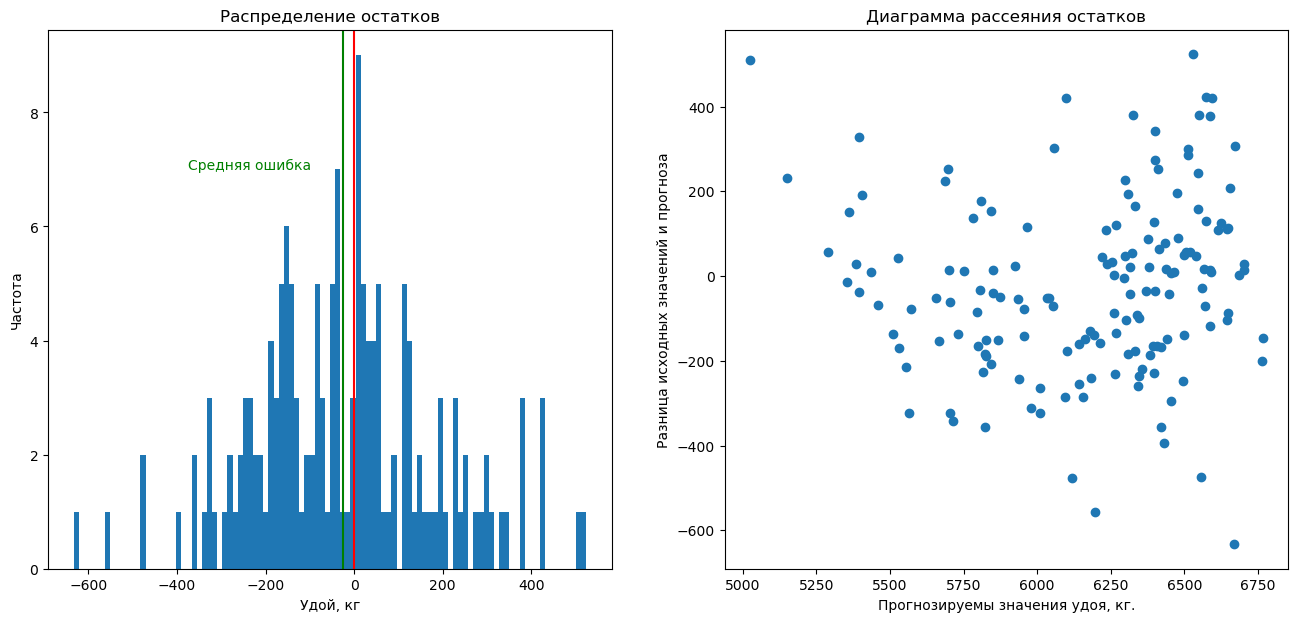

In [65]:
leftovers(y_test1, predictions1)

Распределение остатков непохоже на нормальное со смещением влево

- На краях диаграммы рассеяния наибольшое расхождение, скорее всего из-за того, что модели не хватает данных на этих промежутках, поэтому она так сильно ошибается
- Остальной промежуток имеет форму рупора с увеличением диспресии

#### Промежуточные итоги

- Были подготовлены данные для модели линейной регрессии
- Обучена модели и показатель $R^2 = 0.80$
- Распределение остатков непохоже на нормальное со смещением влево
- На краях диаграммы рассеяния наибольшое расхождение, скорее всего из-за того, что модели не хватает данных на этих промежутках, поэтому она так сильно ошибается
- Остальной промежуток имеет форму рупора с увеличением диспресии

### Вторая модель

Из анализа диаграмм рассеяния, можно преобразовать данные для улучшения прогноза линейной регрессии

Показатель ЭКЕ имеет с удоем квадратичную зависимость, поэтому добавим новую колонку с квадратом ЭКЕ.

СПО четко разделенно на две группы больше 91% и меньше, поэтому преобразуем его в бинарный признак

In [66]:
main['efu_sq'] = main['efu']**2
main['spr_%_bi'] = main['spr_%'].apply(lambda x: 0 if x <= 91 else 1)

#### Подготовка данных

In [67]:
columns = list(main.columns)
ls_obj = []
ls_float = []

for s in columns:
    if str(main[s].dtype) == 'object':
        ls_obj.append(s)
    else:
        ls_float.append(s)
ls_float.remove('id')
ls_float.remove('spr_%')
ls_float.remove('efu')
ls_float.remove('fat_%')
ls_float.remove('protein_%')
ls_obj.remove('milk_taste')
ls_float.remove('yield_kg')

In [68]:
RANDOM_STATE = 42

X = main.drop(['id', 'yield_kg', 'spr_%', 'efu'], axis=1)
y = main['yield_kg']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=RANDOM_STATE)


scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_scaled2 = scaler.fit_transform(X_train2[ls_float])
X_test_scaled2 = scaler.transform(X_test2[ls_float])

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=ls_float)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=ls_float)

X_train_ohe2 = encoder.fit_transform(X_train2[ls_obj])
X_test_ohe2 = encoder.transform(X_test2[ls_obj])
encoder_col_names2 = encoder.get_feature_names_out()

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)

X_train_scaled_ohe2 = pd.concat([X_train_scaled2, X_train_ohe2], axis=1)
X_test_scaled_ohe2 = pd.concat([X_test_scaled2, X_test_ohe2], axis=1)

#### Обучение модели

In [69]:
model_lr2 = LinearRegression()

model_lr2.fit(X_train_scaled_ohe2, y_train2)
predictions2 = model_lr2.predict(X_test_scaled_ohe2)

r2_score_linear2 = r2_score(y_test2, predictions2)
print(r2_score_linear2)

0.8180879926867504


С учетом изменений исходных данных, $R^2$ стала выше

#### Анализ остатков

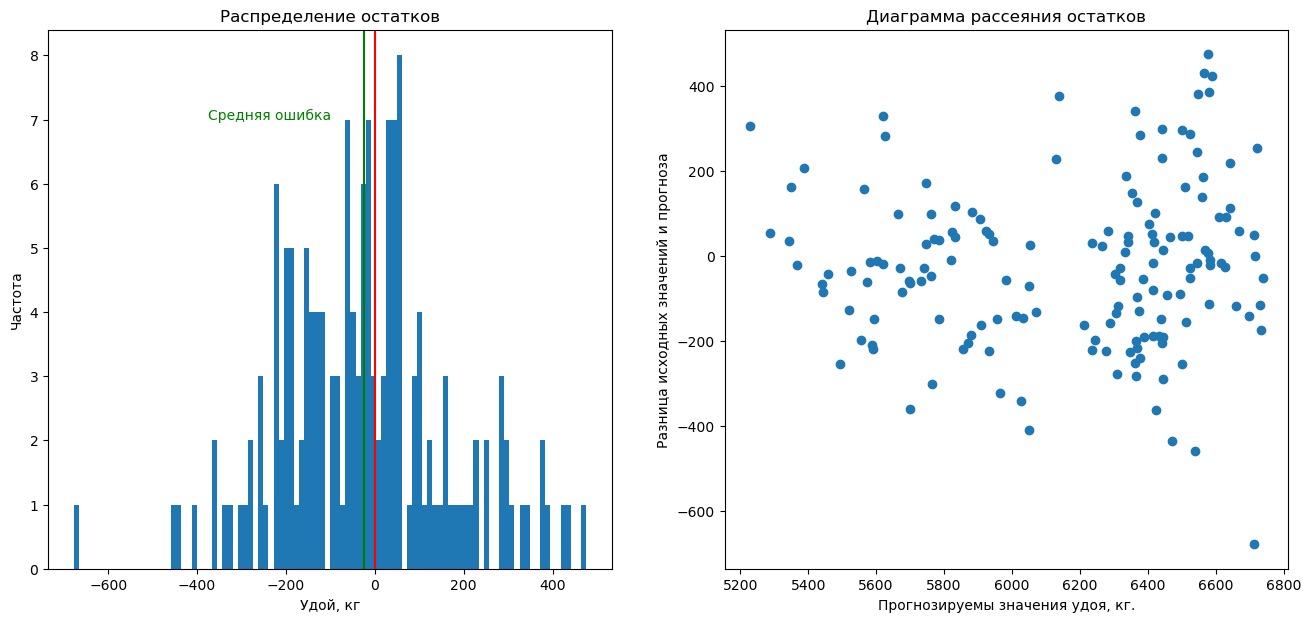

In [70]:
leftovers(y_test2, predictions2)

- Распределение похоже на нормальное со смещением влево
- Диаграмма рассеяния представляет собой рупорт с увеличением дисперсии

##### Промежуточные итоги
- $R^2=0.818$
- Распределение похоже на нормальное со смещением влево
- Диаграмма рассеяния представляет собой рупорт с увеличением дисперсии

### Третья модель

In [71]:
main_dad = pd.merge(main, dad, on='id')
main_dad

,id,yield_kg,efu,protein_g,spr_%,breed,pasture_type,father_breed,fat_%,protein_%,milk_taste,age,efu_sq,spr_%_bi,father_name
0,1,5863,14.2,1743,89.0,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0,буйный
1,2,5529,12.8,2138,89.0,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0,соловчик
2,3,5810,14.0,1854,88.5,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0,барин
3,4,5895,12.4,2012,88.5,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0,буйный
4,5,5302,12.8,1675,88.5,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,94.0,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,1,буйный
624,626,5513,12.9,1700,88.0,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,166.41,0,барин
625,627,5970,14.4,1837,88.0,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,207.36,0,барин
626,628,5746,13.8,1994,89.0,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,190.44,0,барин


In [72]:
columns = list(main_dad.columns)
ls_obj = []
ls_float = []

for s in columns:
    if str(main_dad[s].dtype) == 'object':
        ls_obj.append(s)
    else:
        ls_float.append(s)
ls_float.remove('id')
ls_float.remove('spr_%')
ls_float.remove('efu')
ls_float.remove('fat_%')
ls_float.remove('protein_%')
ls_obj.remove('milk_taste')
ls_float.remove('yield_kg')

In [73]:
RANDOM_STATE = 42

X = main_dad.drop(['id', 'yield_kg', 'spr_%', 'efu'], axis=1)
y = main_dad['yield_kg']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=RANDOM_STATE)


scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_scaled3 = scaler.fit_transform(X_train3[ls_float])
X_test_scaled3 = scaler.transform(X_test3[ls_float])

X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=ls_float)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=ls_float)

X_train_ohe3 = encoder.fit_transform(X_train3[ls_obj])
X_test_ohe3 = encoder.transform(X_test3[ls_obj])
encoder_col_names3 = encoder.get_feature_names_out()

X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names3)

X_train_scaled_ohe3 = pd.concat([X_train_scaled3, X_train_ohe3], axis=1)
X_test_scaled_ohe3 = pd.concat([X_test_scaled3, X_test_ohe3], axis=1)

#### Обучение модели

In [74]:
model_lr3 = LinearRegression()

model_lr3.fit(X_train_scaled_ohe3, y_train3)
predictions3 = model_lr3.predict(X_test_scaled_ohe3)

r2_score_linear3 = r2_score(y_test3, predictions3)
print(r2_score_linear3)

0.8247542745210406


$R^2=0.824$, что выше чем у двух предыдущих моделей

#### Анализ остатков

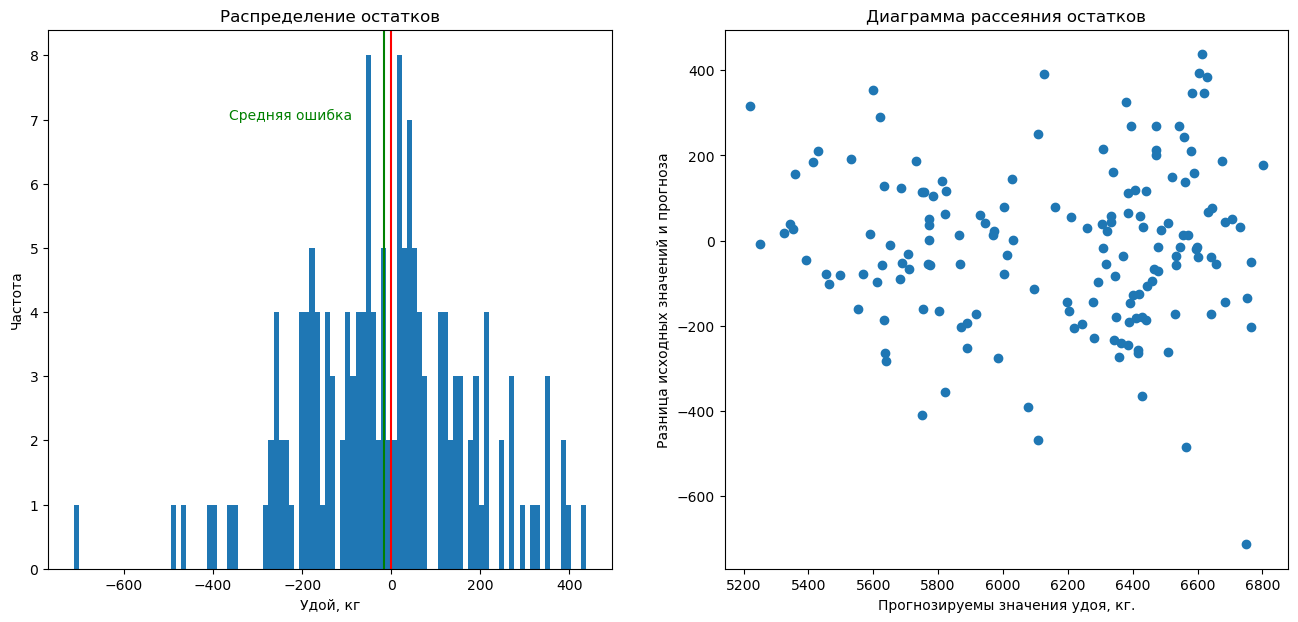

In [75]:
leftovers(y_test3, predictions3)

- Распределение остатков похоже на нормальное со смещением влево
- Диаграмма рассеяния остатков периодична и увеличение дисперсии на некоторых участках

#### Промежуточные итоги
- $R^2=0.824$
- Распределение остатков похоже на нормальное со смещением влево
- Диаграмма рассеяния остатков периодична и увеличение дисперсии на некоторых участках

#### Сравнение моделей

In [76]:
linear_models = pd.DataFrame(['Первая','Вторая','Третья'], columns=['item'])

linear_models['r2_score'] = [r2_score_linear1, r2_score_linear2, r2_score_linear3]

linear_models['mse'] = [mean_squared_error(y_test1, predictions1),
                        mean_squared_error(y_test2, predictions2), 
                        mean_squared_error(y_test3, predictions3)]

linear_models['mae'] = [mean_absolute_error(y_test1, predictions1),
                        mean_absolute_error(y_test2, predictions2),
                        mean_absolute_error(y_test3, predictions3)]

linear_models['rmse'] = linear_models['mse']**(1/2)

linear_models['residuals_mean'] = [np.mean(y_test1 - predictions1), 
                              np.mean(y_test2 - predictions2), 
                              np.mean(y_test3 - predictions3)]
linear_models

,item,r2_score,mse,mae,rmse,residuals_mean
0,Первая,0.784408,43887.015010,164.241945,209.492279,-25.373286
1,Вторая,0.818088,37030.911311,149.039652,192.434174,-24.372798
2,Третья,0.824754,35673.889886,146.163024,188.875329,-15.201522


По всем показателям третья модель, в которой были учтены нелинейности и добавлены имена папы быков, лучше

#### Доверительный интервал

In [77]:
st.norm.interval(confidence=0.95, loc=np.mean(predictions3),scale=st.sem(predictions3))

(6092.340075854288, 6221.3750700583805)

95% доверительный интервал лучшей модели лежит в (6092.34, 6221.37)

#### Прогнозирование удоя для cow_buy

In [78]:
cow_buy = cow_buy.reset_index()
cow_buy_temp = cow_buy.copy(deep=True)

In [79]:
cow_buy_temp[['efu', 'protein_g', 'spr_%']] = main[['efu', 'protein_g', 'spr_%']].mean() * 1.05
cow_buy_temp['efu_sq'] = cow_buy_temp['efu']**2
cow_buy_temp['spr_%_bi'] = cow_buy_temp['spr_%'].apply(lambda x: 0 if x <= 91 else 1)
cow_buy_temp = cow_buy_temp.rename(columns={'current_fat_%': 'fat_%', 'current_protein_%': 'protein_%'})
cow_buy_temp.head()

C:\Users\gizza\AppData\Local\Temp\ipykernel_15996\355679664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cow_buy_temp[['efu', 'protein_g', 'spr_%']] = main[['efu', 'protein_g', 'spr_%']].mean() * 1.05
C:\Users\gizza\AppData\Local\Temp\ipykernel_15996\355679664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cow_buy_temp[['efu', 'protein_g', 'spr_%']] = main[['efu', 'protein_g', 'spr_%']].mean() * 1.05
C:\Users\gizza\AppData\Local\Temp\ipykernel_15996\355679664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

,id,breed,pasture_type,father_breed,father_name,fat_%,protein_%,age,efu,protein_g,spr_%,efu_sq,spr_%_bi
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,95.874363,233.361138,1
1,1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,95.874363,233.361138,1
2,2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,95.874363,233.361138,1
3,3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,95.874363,233.361138,1
4,4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,95.874363,233.361138,1


In [80]:
X_train = cow_buy_temp.drop(['id', 'efu', 'spr_%', 'fat_%', 'protein_%'], axis=1)
X_train
X_train_scaled = scaler.transform(X_train[ls_float])


X_train_ohe = encoder.transform(X_train[ls_obj])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=ls_float)


X_train_scaled_ohe = pd.concat([X_train_scaled, X_train_ohe], axis=1)

In [81]:
predictions = model_lr3.predict(X_train_scaled_ohe)

cow_buy['yield_kg'] = predictions

In [82]:
cow_buy

,id,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age,yield_kg
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297
1,1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6378.711028
2,2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775
3,3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.089377
4,4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6542.146066
5,5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6425.380218
6,6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297
7,7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6571.259737
8,8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775
9,9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668


#### Выводы
- Было обучено три модели линейной регрессии
- Было проведено сравнение полученных моделей, метрики лучшей:
    - $R^2=0.825$
    - $MSE=35673.88$
    - $MAE=146.16$
    - $RMSE=188.87$
    - Доверительный интервал в 95% (6092.99, 6224.04)
- Был проведен прогноз для коров на покупку, удой у всех коров выше 6000 кг.

## Обучение модели логистической регрессии

#### Подготовка данных модели логической регрессии

In [83]:
main_temp = main.copy(deep=True)

columns = list(main_temp.columns)
ls_obj = []
ls_float = []

for s in columns:
    if str(main_temp[s].dtype) == 'object':
        ls_obj.append(s)
    else:
        ls_float.append(s)
        
ls_float.remove('id')
ls_float.remove('spr_%')
ls_float.remove('efu')
ls_float.remove('yield_kg')
ls_obj.remove('milk_taste')

In [84]:
RANDOM_STATE = 42

main_temp['milk_taste'] = main_temp['milk_taste'].apply(lambda x: 1 if x =='вкусно' else 0)

X = main_temp.drop(['id', 'milk_taste', 'spr_%', 'efu'], axis=1)
y = main_temp['milk_taste']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, random_state=RANDOM_STATE)


scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_scaled_log = scaler.fit_transform(X_train_log[ls_float])
X_test_scaled_log = scaler.transform(X_test_log[ls_float])

X_train_scaled_log = pd.DataFrame(X_train_scaled_log, columns=ls_float)
X_test_scaled_log = pd.DataFrame(X_test_scaled_log, columns=ls_float)

X_train_ohe_log = encoder.fit_transform(X_train_log[ls_obj])
X_test_ohe_log = encoder.transform(X_test_log[ls_obj])
encoder_col_names_log = encoder.get_feature_names_out()

X_train_ohe_log = pd.DataFrame(X_train_ohe_log, columns=encoder_col_names_log)
X_test_ohe_log = pd.DataFrame(X_test_ohe_log, columns=encoder_col_names_log)

X_train_scaled_ohe_log = pd.concat([X_train_scaled_log, X_train_ohe_log], axis=1)
X_test_scaled_ohe_log = pd.concat([X_test_scaled_log, X_test_ohe_log], axis=1)

#### Обучение модели логической регрессии

In [85]:
clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train_scaled_ohe_log, y_train_log)

predictions = clf.predict(X_test_scaled_ohe_log)

accuracy = accuracy_score(y_test_log, predictions)
recall = recall_score(y_test_log, predictions)
precision = precision_score(y_test_log, predictions)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.6305732484076433
Recall: 0.8522727272727273
Precision: 0.625


- `Accuracy` 63%
- `Recall` самая высокая 85%
- `Precision` 63%

#### Матрица ошибок

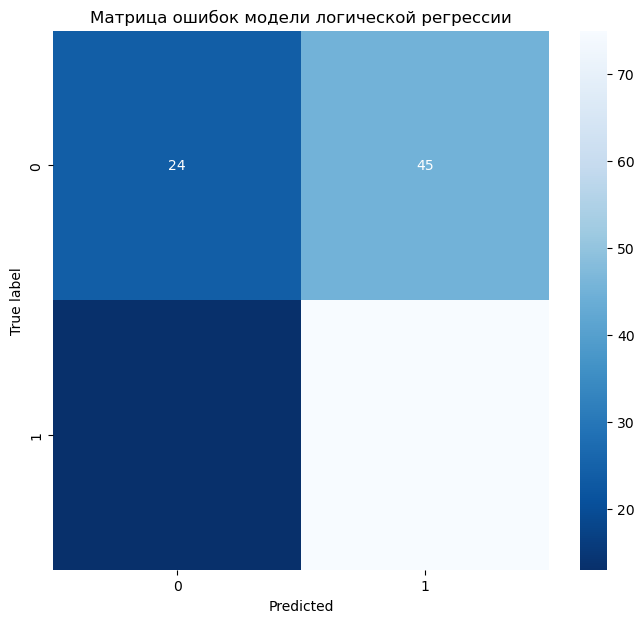

In [86]:
plt.figure(figsize=(8,7))
cm = confusion_matrix(y_test_log, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок модели логической регрессии')
plt.ylabel('True label')
plt.xlabel('Predicted');

- Метрика `Recall` имеет высокое значение , однако стоит обратить внимание на ошибки первого рода. `Precision` и `Accuracy` очень низкие по 63%
- Имеем целых 45 ошибок первого рода, по отношению к 75 верноположительным предсказаниям. Больше половины ошибок: нужно минимизировать их количество

#### Анализ модели логической регрессии

Ошибка первого рода - критичнее всего при покупке коров, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком.

- `Recall`:

    В метрике задействуются ответы TP и FN. Ошибки второго рода - не критичны для нас, поскольку нет страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить не вкусное.
    
    
- `Precision`:

    В метрике задействуются ответы TP и FP. Количество FP (ошибок первого рода) нужно сводить к минимуму, ибо они критичны. В таком случае можно сказать, что нам нужно максимизировать метрику Precision.

#### Подбор порога принадлежности к классам

Возьмем различные значения порога и найдем FP значения

In [87]:
y_proba = clf.predict_proba(X_test_scaled_ohe_log)[:,1]

data = pd.DataFrame(zip(y_test_log, y_proba),
             columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)

thresholds = [round(i,2) for i in np.linspace(0.5, 1, num = 15, endpoint=False)]

columns = []
thresholds_values = []
fp = []

conf_matrix = pd.DataFrame()

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i  else 0)
    thresholds_values.append(i)
    fp.append(confusion_matrix(data['y_test'], data['y_pred_'+str(i)])[0][1])

conf_matrix['thresholds_values'] = thresholds_values
conf_matrix['FP'] = fp
conf_matrix

,thresholds_values,FP
0,0.50,45
1,0.53,41
2,0.57,34
3,0.60,26
4,0.63,18
5,0.67,14
6,0.70,6
7,0.73,5
8,0.77,2
9,0.80,0


Как можно заметить при пороге в 0.8 FP равно нулю

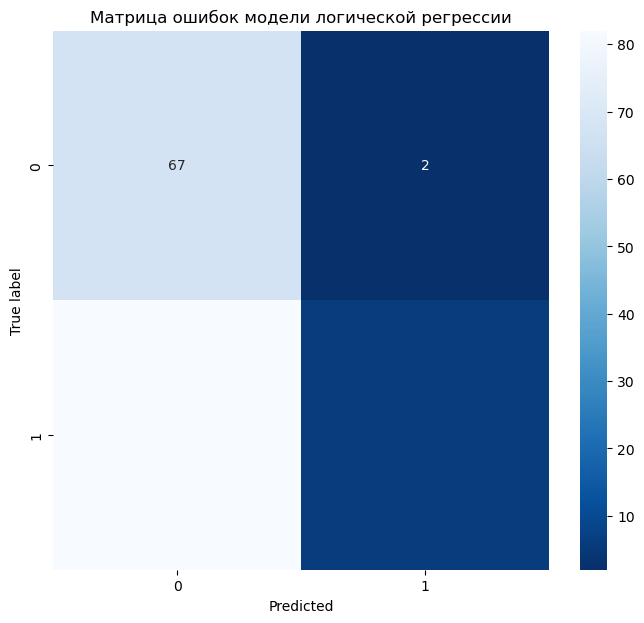

In [88]:
plt.figure(figsize=(8,7))
cm = confusion_matrix(y_test_log, data['y_pred_0.8'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок модели логической регрессии')
plt.ylabel('True label')
plt.xlabel('Predicted');

FP снизилось до 2 значений

In [89]:
accuracy = accuracy_score(data['y_test'], data['y_pred_0.8'])
recall = recall_score(data['y_test'], data['y_pred_0.8'])
precision = precision_score(data['y_test'], data['y_pred_0.8'])

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.49044585987261147
Recall: 0.09090909090909091
Precision: 1.0


`Precision` вышла равной 1.0, что нам и нужно было

In [90]:
threshold_needful = 0.8

In [91]:
X_train = cow_buy_temp.drop(['id'], axis=1)

X_train_scaled = scaler.transform(X_train[ls_float])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=ls_float)

X_train_ohe = encoder.transform(X_train[ls_obj])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names_log)

X_train_scaled_ohe = pd.concat([X_train_scaled, X_train_ohe], axis=1)

In [92]:
y_proba = clf.predict_proba(X_train_scaled_ohe)[:,1]

cow_buy['milk_taste'] = y_proba
cow_buy['milk_taste'] = cow_buy['milk_taste'].apply(lambda x: 1 if x>=threshold_needful else 0)
cow_buy['milk_taste'] = cow_buy['milk_taste'].apply(lambda x: 'вкусно' if x==1 else 'не вкусно')
cow_buy

,id,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age,yield_kg,milk_taste
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
1,1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6378.711028,не вкусно
2,2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
3,3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6542.146066,не вкусно
5,5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6425.380218,не вкусно
6,6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
7,7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6571.259737,не вкусно
8,8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
9,9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668,не вкусно


При выбранном пороге в 0.8 у всех коров молоко не вкусное, поэтому немного снизим порог принадлежности

In [93]:
threshold_needful = 0.7

In [94]:
y_proba = clf.predict_proba(X_train_scaled_ohe)[:,1]

cow_buy['milk_taste'] = y_proba
cow_buy['milk_taste'] = cow_buy['milk_taste'].apply(lambda x: 1 if x>=threshold_needful else 0)
cow_buy['milk_taste'] = cow_buy['milk_taste'].apply(lambda x: 'вкусно' if x==1 else 'не вкусно')
cow_buy

,id,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age,yield_kg,milk_taste
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6378.711028,не вкусно
2,2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
3,3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6542.146066,не вкусно
5,5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6425.380218,не вкусно
6,6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
7,7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6571.259737,не вкусно
8,8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
9,9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно


Так уже лучше, теперь выберем коров на продажу, у которых вкусное молоко и удой выше 6000 кг.

In [95]:
cow_buy_final = cow_buy.loc[(cow_buy['yield_kg'] >= 6000) & (cow_buy['milk_taste'] == 'вкусно')]
cow_buy_final

,id,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age,yield_kg,milk_taste
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
6,6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
9,9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
16,16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,6344.707860,вкусно


#### Промежуточные итоги
- Была обучена модель логической регрессиии
- Был подобран оптимальный порог принадлежности классов, на основе матрицы ошибок, равный 0.7
- Был спрогнозирован вкус молока у коров на продажу и выбраны коровы с вкусным молоком и удоем выше 6000 кг.

## Итоговые выводы

Из стада на продажу были найдены лучшие кандидаты.

In [96]:
cow_buy_final

,id,breed,pasture_type,father_breed,father_name,current_fat_%,current_protein_%,age,yield_kg,milk_taste
0,0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
6,6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
9,9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
16,16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,6344.707860,вкусно


Такие данные получились на основании прогноза линейной и логической регрессии, с учетом всех доступных факторов. Также было учтены ложноположительные значения, которые могла выдать модель, с увеличением порога принадлежности до 0.7, поэтому вышеприведенные кандидаты лучшие на покупку.

Сделайте выводы о моделях линейной регрессии и логистической регрессии.
- Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
- Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

Для модели линейной регрессии
 - Данные по ЭКЕ были переведены в квадратичную зависимость
 - Данные по СПО были переведены в бинарную выше 91% и ниже
Что позволило улучшить все метрики

Для модели логической регресии
 - Данные по ЭКЕ и СПО были отработаны также, как и для линейной регрессии
 - Вкус молока был переведен в бинарное значение 1 - вкусное, 0 - не вкусное
 
Улучшение результата моделей можно достичь добавлением новых параметров либо обработкой численных признаков, у которых например низкие или высокие значения удоя, это можно заметить на анализе остатков при построении диаграммы рассеяния, дисперсия у краев интервала выше чем в середине.

При анализе рисков или экономических рассчетов все использованные в данном проекте метрики важны, только `recall` и `precision` нужно использовать от типа задачи

1. **Предобработка данных**
    - В каждой таблице был приведен корректный тип данных
    - Все строковые стоблцы были переведены в нижний регистр
    - Пропусков нет
    - Явные и неявные дубликаты были отработаны
    - Были построенны гистограммы для поиска аномальных значений в данных
    - Аномалии были отработаны
2. **Исследовательский анализ данных**
    - **main**
        - Больше всего пород у фермера `вис бик айдиал`
        - Основный тип пастбищ `холмистое`
        - Породы папы быка примерно одинаковое `айдиал` и `соверин`
        - В основном молоко вкусное
        - У 83% коров возраст более 2 лет, у остальные менее
        - У всех числовых показателей распределение не является нормальным, кроме процента белка
        - Медианные значения ЭКЕ для обеих пород возрастом менее двух лет равны
        - У `рефлешнсоверинг` ЭКЕ выше при возрасте более 2 лет
        - У `вис бик айдиал` жирность выше при возрасте менее 2 лет
        - При возрасте более двух лет жирность одинаковая
        - Процент белка для обоих пород обоих возрастов одинаковый
        - Значение протеина для обеих пород и возрастов практически равны
        - СПО одинаковое для обеих пород и возрастов
        - Удой различается при возрасте менее 2 лет у `вис бик айдиал` выше, при более двух лет ситуация обратная
        - Медианные значения ЭКЕ для `рефлешнсоверинг` выше не зависимо от типа пастбища
        - У `рефлешнсоверинг` жирность выше не зависимо от типа пастбища
        - При возрасте более двух лет жирность одинаковая
        - Процент белка для обоих пород обоих типов пастбищ одинаковый
        - Значение протеина для обеих пород и типов пастбищ практически равны
        - СПО одинаковое для обеих пород и ипов пастбищ
        - Удой выше у `рефлешнсоверинг` на обеих типах пастбищ
        - Все показатели примерное равны для вкуса молока, но у породы `рефлешнсоверинг` чуть выше. Отсюда можно сказать, что на вкус молока влияют другие показатели 
        - Практически все показатели у `рефлешнсоверинг` выше для различных пород папа быка, чем у `вис бик айдиал`, но также можно заметить, что все показатели порода папы быка `айдиал` выше, чем у `соверин`
    
    - **dad**
        - Больше всего детей у Барина 38% и Буйного 34%
        - У Соловчика и Геркулеса по 18% и 10% соответственно
    - **cow_buy**
        - Пород `Вис бик айдиал` и `Рефлешнсоверинг` поровну
        - Поровну типы пастбищ
        - Пап быков `Соверин` больше 63%, чем `Айдиал` 37%
        - Больше всего коров у которых папа бык `Буйный` и `Геркулес` по 44% и 31% соответственно, `Соловчик` и `Барин` делят остальную часть поровну
        - В основном возраст коров более 2 лет 69%
        - Наиболее вероятные значения это 3.4% и 3.75% жирности, которые соответствуют скорее всего двум данным породам, а остальные значения отклонения
        - Больше всего коров с процентом белка около 3.053, 3.075, 3.079%
        - Значение белка у обоих пород для обеих типов пастибищ одинаковое
        - Значение жирности у `Вис бик айдиал` выше на холмистой местности, на равнинной наоборот
        - Значение белка у обеих пород пап быков и самих коров не различаются
        - У `Вис бик айдиал` жирность ниже у породы папы `Соверин`, у `Айдиал` ситуация противоположная
        - Значения белка у обеих пород и возраста не различаются
        - Жирность у коров с возрастом менее 2 лет выше у `Рефлешнсоверинг`, на возрасте более 2 лет практически одинаковая жирность у обеих пород
        - Процент белка у коров в зависимости от пап быков одинаковое
        - Жироность выше от `Геркулеса` и `Соловчика`, самая низкая от `Буйного`
    
**Выводы о данных**
- У удоя была аномалия, которая была отработана. Распределение числовых показателей имеют ненормальное распределение, кроме процента белка, скорее всего из-за того, что в выборке учавствуют только две породы коров, которые более вероятно дают одинаковое по данным показателям молоко
- СПО (Сахаро-протеиновое соотношение) из коэф. была переведена в проценты для удобства
- Категориальные признаки представлены только двумя значениями так, что можно закодировать их бинарно

3. **Корреляционный анализ**
    - Коэффициенты корреляций удоя:
        - ЭКЕ, высокая
        - Протеин в граммах, слабая
        - СПО, высокая
        - Жирность, средняя
        - Протеин в процентах, очень слабая

    - Коэффициенты корреляций ЭКЕ:
        - Протеин в граммах, слабая
        - СПО, высокая
        - Жирность, средняя
        - Протеин в процентах, очень слабая

    - Коэффициенты корреляций протеина в граммах:
        - СПО, слабая
        - Жирность, слабая
        - Протеин в процентах, очень слабая

    - Коэффициенты корреляций СПО:
        - Жирность, средняя
        - Протеин в процентах, очень слабая

    - Коэффициенты корреляций Жирности:
        - Протеин в процентах, очень слабая

    - Диаграмма рассеяния
        - Присутствует мультиколлинеарность между входным признаком ЭКЕ и целевым удой
        - Зависимость протеина и удоя случайная, нет признаков мультиколлинеарности
        - СПО присутствуют два кластера, которые скорее всего отвечают различным категориальным признакам
        - Жирность, отсутствует линейная зависимость
        - Протеин %, тоже
        
4. **Обучение модели линейной регрессии**
    - Было обучено три модели линейной регрессии
    - Было проведено сравнение полученных моделей, метрики лучшей:
        - $R^2=0.825$
        - $MSE=35673.88$
        - $MAE=146.16$
        - $RMSE=188.87$
        - Доверительный интервал в 95% (6092.34, 6221.37)
    - Был проведен прогноз для коров на покупку, удой у всех коров выше 6000 кг.
5. **Обучение модели логической регрессии**
    - Была обучена модель логической регрессиии
    - Был подобран оптимальный порог принадлежности классов, на основе матрицы ошибок, равный 0.7
    - Был спрогнозирован вкус молока у коров на продажу и выбраны коровы с вкусным молоком и удоем выше 6000 кг.